<a href="https://colab.research.google.com/github/tejaspatni/Exploratory-Data-Analysis-AMEO-Data-/blob/main/Project_Exploratory_Data_Analysis_(AMEO_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary -**

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Innomatics research Labs/aspiring_minds_employability_outcomes_2015.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3998, 39)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

#### Duplicate Values

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, ID, Salary, DOJ, DOL, Designation, JobCity, Gender, DOB, 10percentage, 10board, 12graduation, 12percentage, 12board, CollegeID, CollegeTier, Degree, Specialization, collegeGPA, CollegeCityID, CollegeCityTier, CollegeState, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience]
Index: []

[0 rows x 39 columns]

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

### What did you know about your dataset?

Observations:
1. There are total 3398 rows and 39 columns
2. There is no duplicate values but there might be null value written instead of NaN.
3. The datatypes of the dataset are consists of int,float,object and datetime

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

### Variables Description 


1. ID -	UID -	A unique ID to identify a candidate
2. Salary -	Continuous - Annual CTC oﬀered to the candidate (in INR)
3. DOJ -	Date -	Date of joining the company
4. DOL - 	Date - 	Date of leaving the company
5. Designation - 	Categorical -	Designation oﬀered in the job
6. JobCity -	Categorical -	Location of the job (city)
7. Gender -	Categorical -	Candidate’s gender
8. DOB -	Date -	Date of birth of candidate
9. 10percentage -	Continuous -	Overall marks obtained in grade 10
examinations
10. 10board	- Continuous -	The school board whose curriculum the candidate followed in grade 10
11. 12graduation -	Date -	Year of graduation - senior year high school
12. 12percentage -	Continuous -	Overall marks obtained in grade 12
examinations
13. 12board -	 Date -	The school board whose curriculum the candidate followed in grade 12
14. CollegeID -	NA/ID -	Unique ID identifying the college which the candidate attended
15. CollegeTier -	Categorical -	Tier of college
16. Degree -	Categorical -	Degree obtained/pursued by the candidate
17. Specialization -	Categorical -	Specialization pursued by the candidate
18. CollegeGPA -	Continuous -	Aggregate GPA at graduation
19. CollegeCityID -	NA/ID -	A unique ID to identify the city in which the college is located in
20. CollegeCityTier -	Categorical -	The tier of the city in which the college is located
21. CollegeState -	Categorical -	Name of States
22. GraduationYear - 	Date	 -Year of graduation (Bachelor’s degree)
23. English -	Continuous -	Scores in AMCAT English section
24. Logical -	Continuous -	Scores in AMCAT Logical section
25. Quant -	Continuous -	Scores in AMCAT Quantitative section
26. Domain -	Continuous/ Standardized -	Scores in AMCAT’s domain module
27. ComputerProgramming -	Continuous -	Score in AMCAT’s Computer programming
section
28. ElectronicsAndSemicon -	Continuous	- Score in AMCAT’s Electronics & Semiconductor Engineering section
29. ComputerScience	 - Continuous	 - Score in AMCAT’s Computer Science section
30. MechanicalEngg	- Continuous	 - Score in AMCAT’s Mechanical Engineering
section
31. ElectricalEngg -	Continuous -	Score in AMCAT’s Electrical Engineering section
32. TelecomEngg -	Continuous -	Score in AMCAT’s Telecommunication Engineering section
33. CivilEngg	 - Continuous	 - Score in AMCAT’s Civil Engineering section
34. conscientiousness -	Continuous/ Standardized	- Scores in one of the sections of AMCAT’s personality test

35. agreeableness	- Continuous/Standardized - 	Scores in one of the sections of AMCAT’s personality test
36. extraversion -	Continuous/ Standardized -	Scores in one of the sections of AMCAT’s personality test
37. neuroticism	- Continuous/Standardized -	Scores in one of the sections of AMCAT’s personality test
38. openess_to_experience -	Continuous/ Standardized -	Scores in one of the sections of AMCAT’s personality test
 



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Copy df
dt = df.copy()

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [ ]:
# Write your code to make your dataset analysis ready.
# first drop the unnamed variable since it has only 1 value'train' which is irrelevant
dt.drop(['Unnamed: 0'],axis=1,inplace = True)

In [ ]:
# Since all the -1 values are null values, we replaces the -1 to NaN.
dt = dt.replace(-1,np.nan)

In [ ]:
dt.isnull().sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

In [ ]:
dt.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [ ]:
dt['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [ ]:
board10_list = ['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric board',
       'board of secondary education',
       'west bengal board of secondary education',
       'jharkhand secondary examination board,ranchi', 'u p board',
       'bseb,patna', 'hsc', 'bse', 'sss pune',
       'karnataka education board (keeb)', 'kerala',
       'state board of secondary education( ssc)', 'gsheb',
       'up(allahabad)', 'nagpur', 'don bosco maatriculation school',
       'karnataka state secondary education board', 'maharashtra',
       'karnataka secondary education board',
       'himachal pradesh board of school education',
       'certificate of middle years program of ib',
       'karnataka board of secondary education',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'board of secendary education orissa',
       'karantaka secondary education and examination borad', 'hbsc',
       'kseeb(karnataka secondary education examination board)',
       'cbse[gulf zone]', 'hbse', 'state(karnataka board)',
       'jharkhand accademic council',
       'jharkhand secondary examination board (ranchi)',
       'karnataka secondary education examination board', 'delhi board',
       'mirza ahmed ali baig', 'jseb', 'bse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'upbhsie', 'secondary board of rajasthan',
       'tamilnadu matriculation board', 'jharkhand secondary board',
       'board of secondary education,andhara pradesh', 'up baord',
       'state', 'board of intermediate education',
       'state board of secondary education,andhra pradesh',
       'up board , allahabad',
       'stjosephs girls higher sec school,dindigul', 'maharashtra board',
       'education board of kerala', 'board of ssc',
       'maharashtra state board pune',
       'board of school education harayana',
       'secondary school cerfificate', 'maharashtra sate board', 'ksseb',
       'bihar examination board, patna', 'latur',
       'board of secondary education, rajasthan', 'state borad hp',
       'cluny', 'bsepatna', 'up borad', 'ssc board of andrapradesh',
       'matric', 'bse,orissa', 'ssc-andhra pradesh', 'mp',
       'karnataka education board', 'mhsbse',
       'karnataka sslc board bangalore', 'karnataka', 'u p',
       'secondary school of education', 'state board of karnataka',
       'karnataka secondary board', 'andhra pradesh board ssc',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'hse,orissa', 'national public school', 'nagpur board',
       'jharkhand academic council', 'bsemp',
       'board of secondary education, andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary education,ap',
       'board of secondary education,andhra pradesh',
       'jawahar navodaya vidyalaya', 'aisse',
       'karnataka board of higher education', 'bihar',
       'kerala state board', 'cicse', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'bharathi matriculation school', 'uttaranchal state board',
       'wbbsce', 'mp state board', 'seba(assam)', 'anglo indian', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'msbshse,pune', 'tamilnadu state board', 'kerala university',
       'uttaranchal shiksha avam pariksha parishad',
       'bse(board of secondary education)',
       'bright way college, (up board)',
       'school secondary education, andhra pradesh',
       'secondary state certificate',
       'maharashtra state board of secondary and higher secondary education,pune',
       'andhra pradesh state board', 'stmary higher secondary', 'cgbse',
       'secondary school certificate', 'rajasthan board ajmer', 'mpbse',
       'pune board', 'cbse ', 'board of secondary education,orissa',
       'maharashtra state board,pune', 'up bord',
       'kiran english medium high school', 'state board (jac, ranchi)',
       'gujarat board', 'state board ', 'sarada high scchool',
       'kalaimagal matriculation higher secondary school',
       'karnataka board', 'maharastra board', 'sslc board',
       'ssc maharashtra board', 'tamil nadu state', 'uttrakhand board',
       'bihar secondary education board,patna',
       'haryana board of school education',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ksseb(karnataka state board)', 'nashik board',
       'jharkhand secondary education board', 'himachal pradesh board',
       'maharashtra satate board',
       'maharashtra state board mumbai divisional board',
       'dav public school,hehal',
       'state board of secondary education, ap',
       'rajasthan board of secondary education', 'hsce',
       'karnataka secondary education',
       'board of secondary education,odisha', 'maharashtra nasik board',
       'west bengal board of secondary examination (wbbse)',
       'holy cross matriculation hr sec school', 'cbsc', 'apssc',
       'bseb patna', 'kolhapur', 'bseb, patna', 'up board allahabad',
       'biharboard', 'nagpur board,nagpur', 'pune', 'gyan bharati school',
       'rbse,ajmer', 'board of secondaray education',
       'secondary school education', 'state bord', 'jbse,jharkhand',
       'hse', 'madhya pradesh board', 'bihar school examination board',
       'west bengal board of secondary eucation', 'state boardmp board ',
       'icse board , new delhi',
       'board of secondary education (bse) orissa',
       'maharashtra state board for ssc',
       'board of secondary school education', 'latur board',
       "stmary's convent inter college", 'nagpur divisional board',
       'ap state board', 'cgbse raipur', 'uttranchal board', 'ksbe',
       'central board of secondary education, new delhi',
       'bihar school examination board patna', 'cbse board',
       'sslc,karnataka', 'mp-bse', 'up bourd', 'dav public school sec 14',
       'board of school education haryana',
       'council for indian school certificate examination',
       'aurangabad board', 'j&k state board of school education',
       'maharashtra state board of secondary and higher secondary education',
       'maharashtra state boar of secondary and higher secondary education',
       'ssc regular', 'karnataka state examination board', 'nasik',
       'west bengal  board of secondary education', 'up board,allahabad',
       'bseb ,patna',
       'state board - west bengal board of secondary education : wbbse',
       'maharashtra state board of secondary & higher secondary education',
       'delhi public school', 'karnataka secondary eduction',
       'secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)', 'apsche',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'kea', 'board of secondary education - andhra pradesh',
       'ap state board for secondary education', 'seba',
       'punjab school education board, mohali',
       'jharkhand acedemic council', 'hse,board',
       'board of ssc education andhra pradesh', 'up-board', 'bse,odisha']

In [ ]:
#replacing the redundant values of the 10board column with 'state','cbse','icse' and 'n/a'
list10_cbse=['cbse', 
       'all india board','cbese','central board of secondary education','cbse[gulf zone]','cbse ','cbsc','central board of secondary education, new delhi','cbse board']

list10_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi','icse board','icse board , new delhi']

for i in board10_list:
  if i in list10_cbse:
    dt['10board'].replace(i,'cbse',inplace=True)
  elif i in list10_icse:
    dt['10board'].replace(i,'icse',inplace=True)
  elif i == 0:
    dt['10board'].replace(0,'n/a',inplace=True)
  else:
    dt['10board'].replace(i,'state',inplace=True)


dt['10board'].unique()

array(['state', 'cbse', 'icse', 'n/a'], dtype=object)

<Axes: >

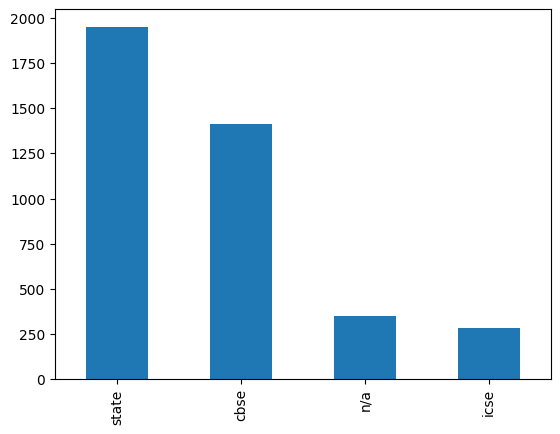

In [ ]:
dt['10board'].value_counts().plot(kind='bar')

In [ ]:
dt['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [ ]:
board12_list =['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec', 'all india board',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 'cicse',
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'andhra pradesh state board', 'cgbse',
       'diploma in computers', 'bte,delhi', 'rajasthan board ajmer',
       'mpbse', 'pune board', 'state board of technical education',
       'gshseb', 'amravati divisional board',
       'dote (diploma - computer engg)', 'up bord',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'gujarat board', 'aligarh muslim university',
       'tamil nadu state board', 'hse', 'karnataka secondary education',
       'state board ', 'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'intermideate', 'nagpur board,nagpur',
       'diploma(msbte)', 'dav public school',
       'pre university board, karnataka', 'ssm srsecschool', 'state bord',
       'jstb,jharkhand', 'intermediate board of education',
       'mp board bhopal', 'pub', 'madhya pradesh board',
       'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
       'isc board , new delhi', 'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 'central board of secondary education, new delhi',
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 'cbese',
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate']

In [ ]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' and 'n/a'
list12_cbse=['cbse', 
       'all india board','cbese','central board of secondary education','cbse[gulf zone]','cbse ','cbsc','central board of secondary education, new delhi','cbse board']

list12_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi','icse board','icse board , new delhi']

for i in board12_list:
  if i in list12_cbse:
    dt['12board'].replace(i,'cbse',inplace=True)
  elif i in list12_icse:
    dt['12board'].replace(i,'icse',inplace=True)
  elif i == 0:
    dt['12board'].replace(0,'n/a',inplace=True)
  else:
    dt['12board'].replace(i,'state',inplace=True)

dt['12board'].unique()

array(['state', 'cbse', 'icse', 'n/a'], dtype=object)

<Axes: >

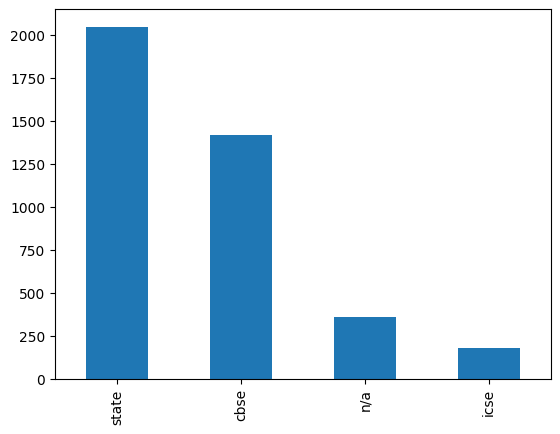

In [ ]:
dt['12board'].value_counts().plot(kind='bar')

In [ ]:
dt['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

<Axes: >

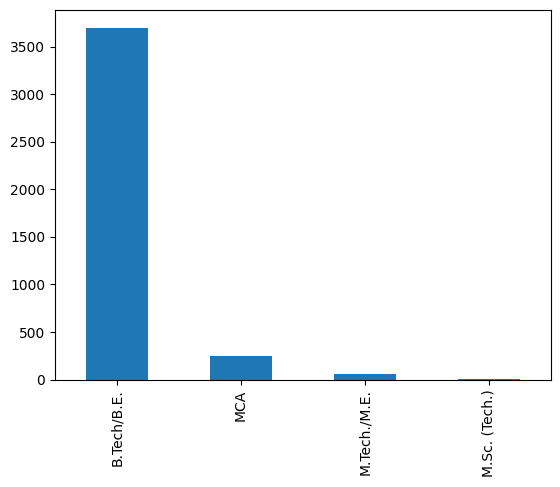

In [ ]:
dt['Degree'].value_counts().plot(kind='bar')

In [ ]:
dt['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

<Axes: >

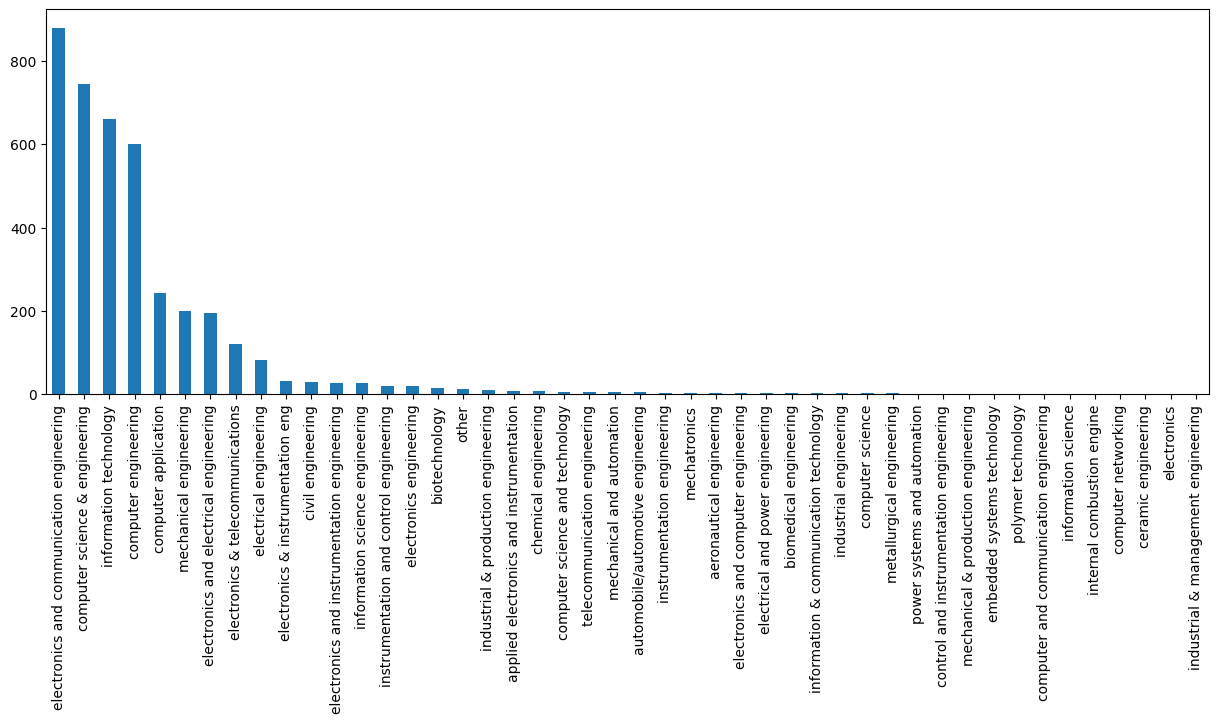

In [ ]:
dt['Specialization'].value_counts().plot(kind='bar',figsize=(15,5))

In [ ]:
specialization_map ={'computer engineering' : 'CS',
       'electronics and communication engineering': 'EC',
       'information technology' : 'CS', 'computer science & engineering' :'CS',
       'mechanical engineering': 'ME', 'electronics and electrical engineering' : 'EC',
       'electronics & telecommunications': 'EC',
       'instrumentation and control engineering':'EC', 'computer application' :'CS',
       'electronics and computer engineering' :'EC', 'electrical engineering':'EC',
       'applied electronics and instrumentation':'EC',
       'electronics & instrumentation eng':'EC',
       'information science engineering' :'CS', 'civil engineering':'CE',
       'mechanical and automation':'ME', 'industrial & production engineering':'Others',
       'control and instrumentation engineering':'EC',
       'metallurgical engineering':'Others',
       'electronics and instrumentation engineering':'EC',
       'electronics engineering':'EC', 'ceramic engineering': 'Others',
       'chemical engineering':'Others', 'aeronautical engineering':'Others', 'other':'Others',
       'biotechnology':'Others', 'embedded systems technology':'EC',
       'electrical and power engineering':'EC',
       'computer science and technology':'CS', 'mechatronics':'ME',
       'automobile/automotive engineering':'ME', 'polymer technology':'Others',
       'mechanical & production engineering':'ME',
       'power systems and automation':'Others', 'instrumentation engineering':'Others',
       'telecommunication engineering':'EC',
       'industrial & management engineering':'Others', 'industrial engineering':'Others',
       'computer and communication engineering':'CS',
       'information & communication technology':'EC', 'information science':'Others',
       'internal combustion engine':'Others', 'computer networking':'CS',
       'biomedical engineering':'Others', 'electronics':'EC', 'computer science':'CS'}

['CS' 'EC' 'ME' 'CE' 'Others']


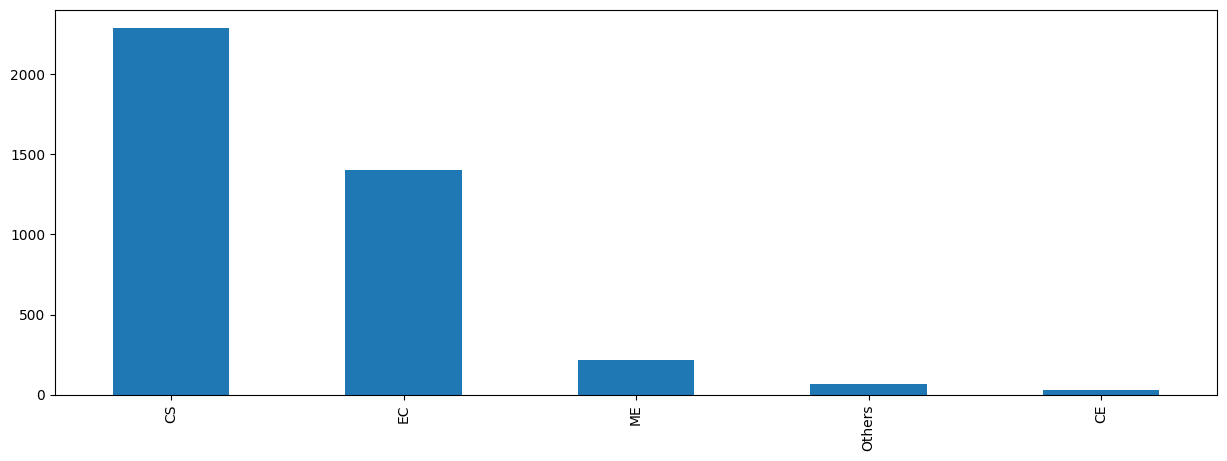

In [ ]:
dt['Specialization'] = dt['Specialization'].map(specialization_map)

dt['Specialization'].value_counts().plot(kind='bar', figsize=(15,5))

print(dt['Specialization'].unique())

In [ ]:
# Since we have this data till the end of 2015. So we can change the present to the last day of 2015.
from datetime import datetime
dt.loc[dt['DOL'] == 'present', 'DOL'] = datetime(2015, 12, 31, 0, 0)

In [ ]:
#Converting to datetime
dt['DOL'] = pd.to_datetime(dt['DOL'])

In [ ]:
# Changing the college GPA on scale of 0-10

dt['collegeGPA'] = round(dt['collegeGPA']/10,2)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3537 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

### What all manipulations have you done and insights you found?

The manipulations we did are:
1. Drop the Unnamed variable.
2. Distributed all the variables as numerical and categorical.
3. Replace all the -1 values to Null values.
4. Replaced all 10 and 12th board attributes to 4 category which is CBSE,ICSE,State and n/a.
5. Change the attriibutes in the specialization domain of computers to CS, Electronics to EC, Mechanical to ME, Civil to CE and rest all to others. 
6. Changed the present values of date of leaving to last day of 2015 and covert it to date time
7. Convert the college GPA on scale of 0-10

## ***4. Data Vizualization : Understand the relationships between variables***

In [ ]:
#Distributing Continuous/Numerical and Categorical/Discrete Data 
Cat_data =['Gender','10board','12board', '12graduation','CollegeTier', 'Degree', 'Specialization','CollegeCityTier','GraduationYear']
Num_data = ['Salary','10percentage', '12percentage','collegeGPA','English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness','agreeableness', 'extraversion', 'nueroticism','openess_to_experience']

In [ ]:
#Distributing Continuous/Numerical and Categorical/Discrete Data 
Dependent_var =['Salary']
Continuous_var = ['10percentage', '12percentage','collegeGPA','English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness','agreeableness', 'extraversion', 'nueroticism','openess_to_experience']

In [ ]:
dt.head()

ID   Salary        DOJ        DOL               Designation    JobCity  \
0  203097   420000 2012-06-01 2015-12-31   senior quality engineer  Bangalore   
1  579905   500000 2013-09-01 2015-12-31         assistant manager     Indore   
2  810601   325000 2014-06-01 2015-12-31          systems engineer    Chennai   
3  267447  1100000 2011-07-01 2015-12-31  senior software engineer    Gurgaon   
4  343523   200000 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage 10board  ...  ComputerScience  \
0      f 1990-02-19          84.3   state  ...              NaN   
1      m 1989-10-04          85.4    cbse  ...              NaN   
2      f 1992-08-03          85.0    cbse  ...              NaN   
3      m 1989-12-05          85.6    cbse  ...              NaN   
4      m 1991-02-27          78.0    cbse  ...              NaN   

   MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg conscientiousness  \
0             NaN            NaN          NaN        NaN            0.9737   
1             NaN            NaN          NaN        NaN           -0.7335   
2             NaN            NaN          NaN        NaN            0.2718   
3             NaN            NaN          NaN        NaN            0.0464   
4             NaN            NaN          NaN        NaN           -0.8810   

  agreeableness  extraversion  nueroticism  openess_to_experience  
0        0.8128        0.5269      1.35490                -0.4455  
1        0.3789        1.2396     -0.10760                 0.8637  
2        1.7109        0.1637     -0.86820                 0.6721  
3        0.3448       -0.3440     -0.40780                -0.9194  
4       -0.2793       -1.0697      0.09163                -0.1295  

[5 rows x 38 columns]

#### Chart - Box Plot(Univariate)

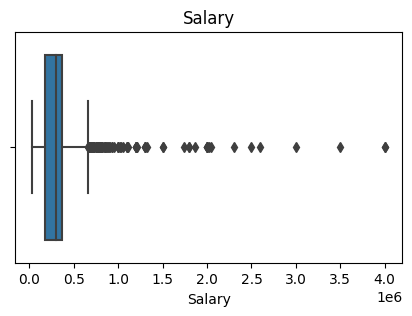

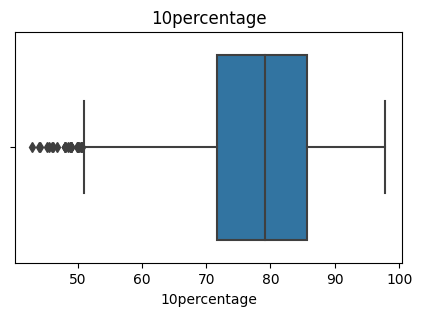

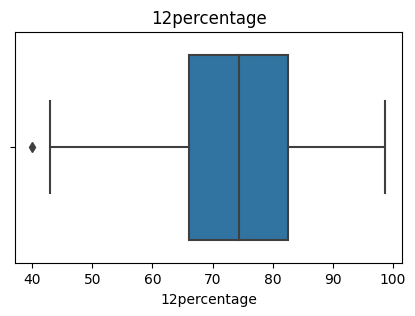

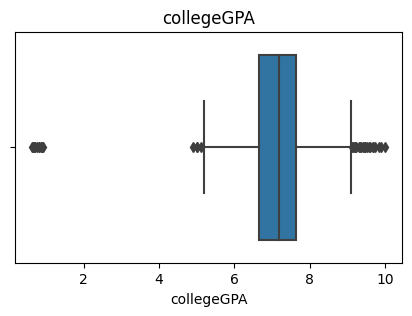

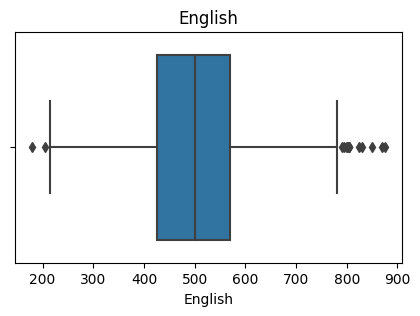

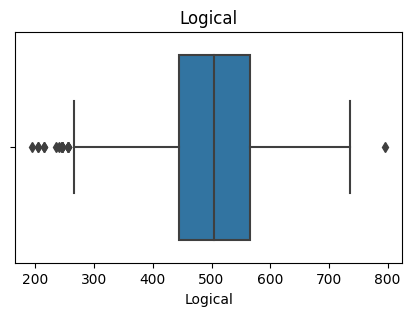

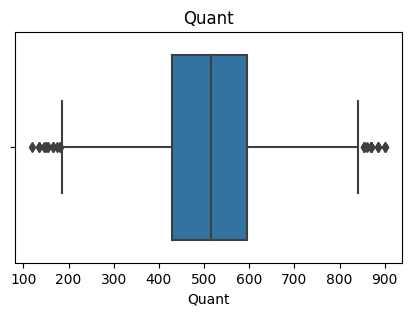

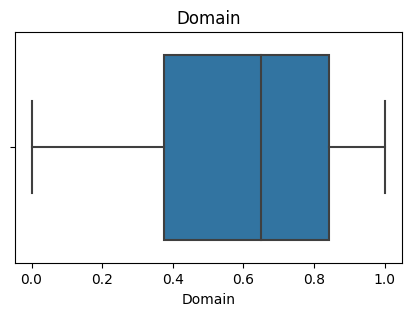

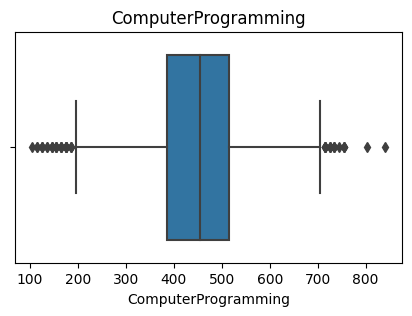

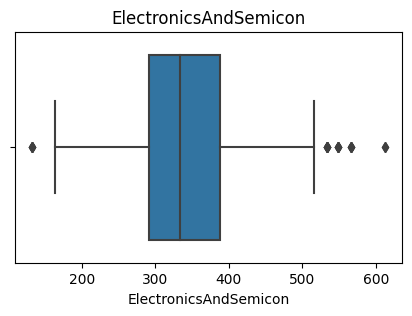

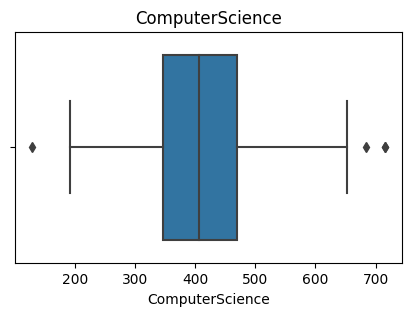

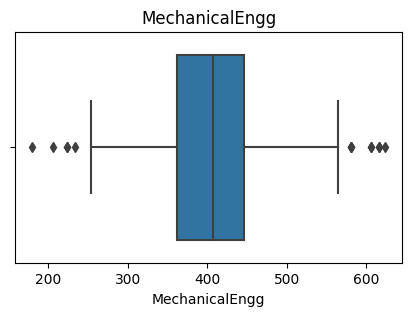

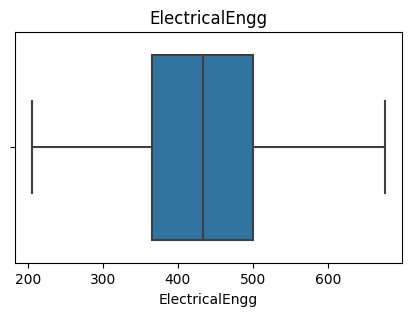

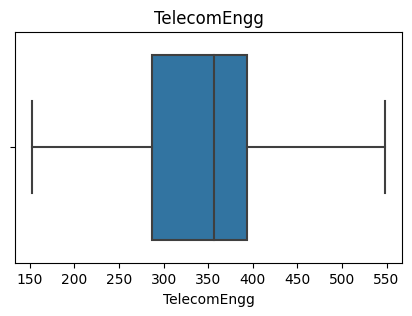

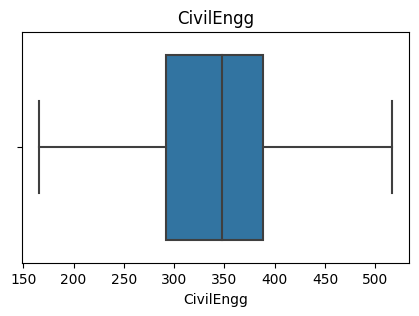

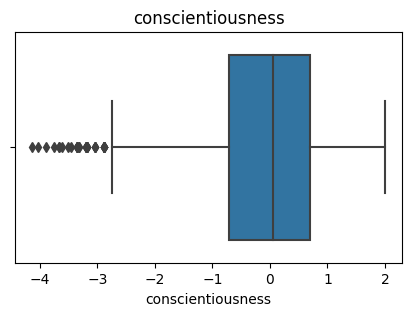

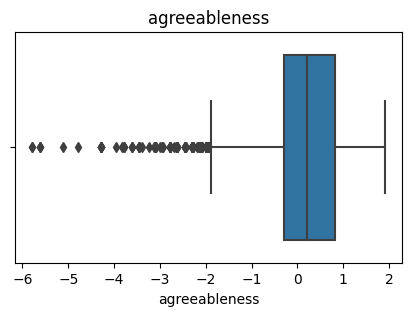

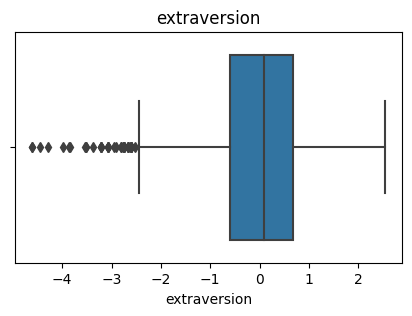

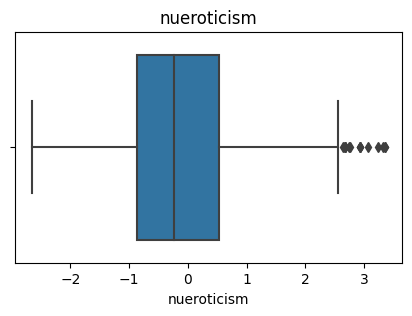

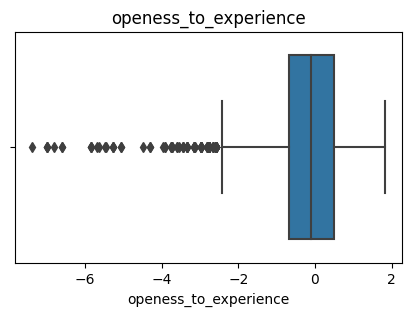

In [ ]:
# Chart visualization code
for col in dt[Num_data]:
  plt.figure(figsize=(5,3))
  sns.boxplot(x=dt[col],data=df) 
  plt.title(col)
  plt.show()

#####  What is/are the insight(s) found from the chart?

We can see that there are many outliers present in the data but these outliers are necessary to extreme points in the data. We will try to handle the ouliers using different methods.

#### Chart - Histogram/Distribution(Univariate)

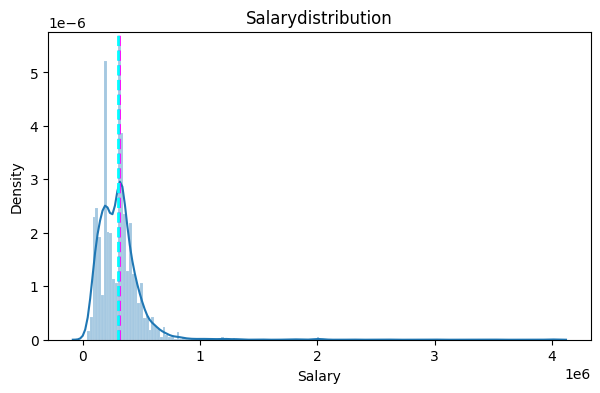

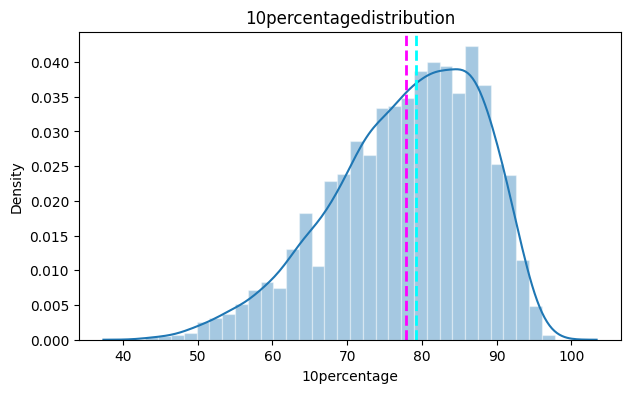

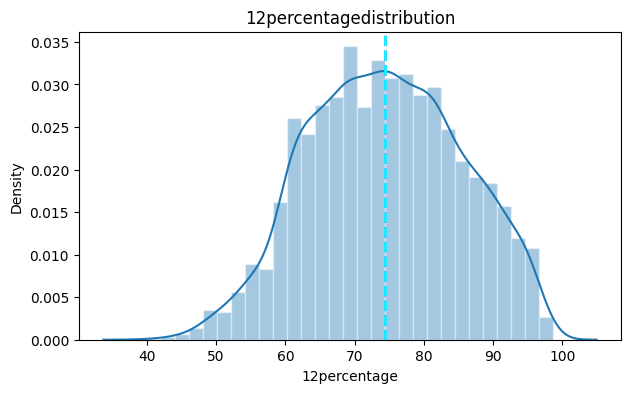

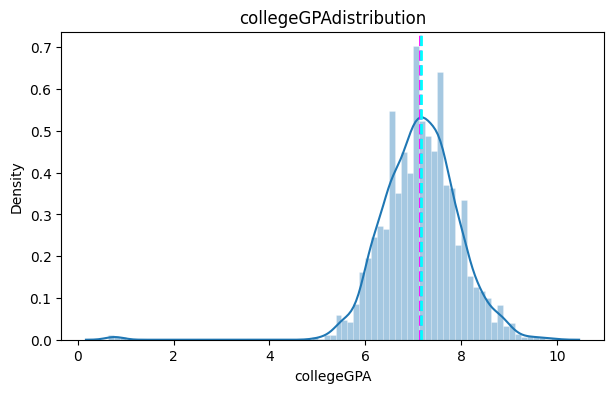

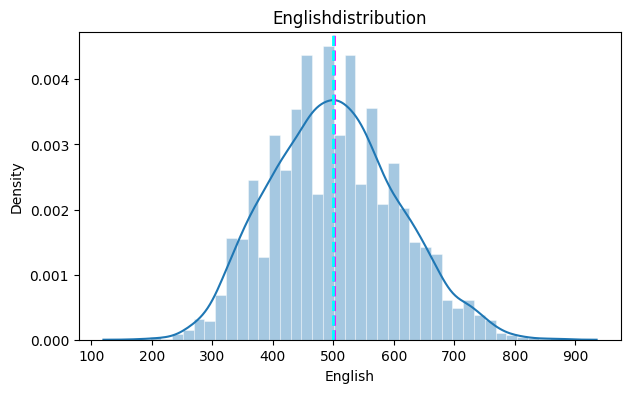

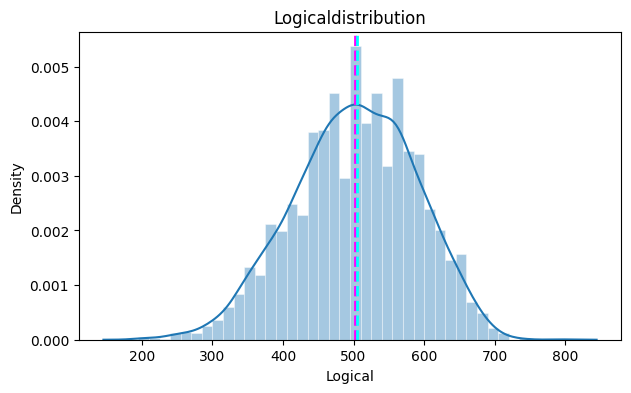

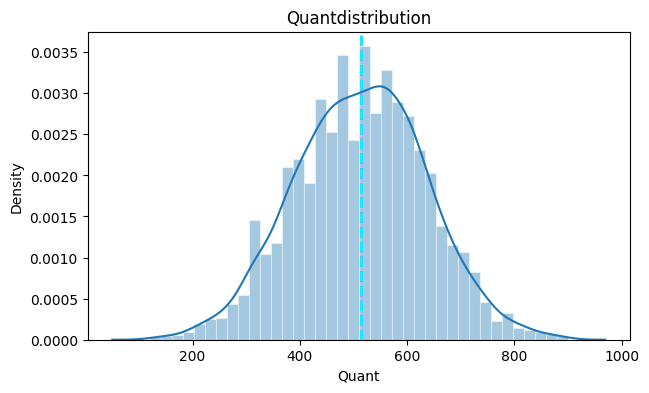

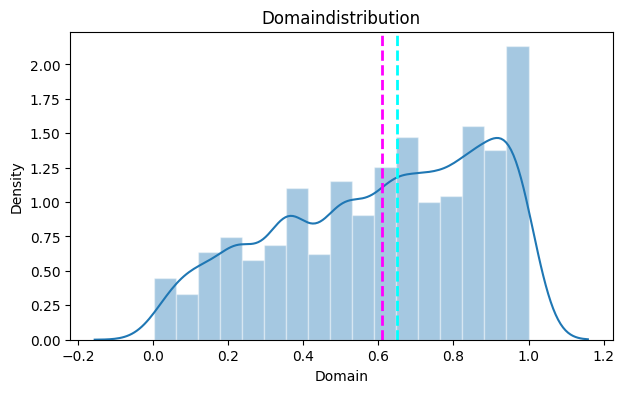

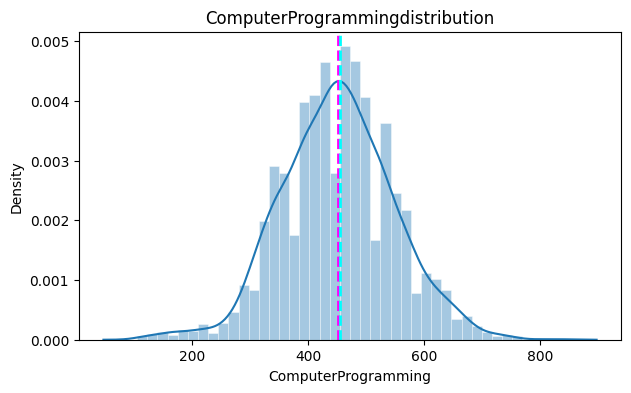

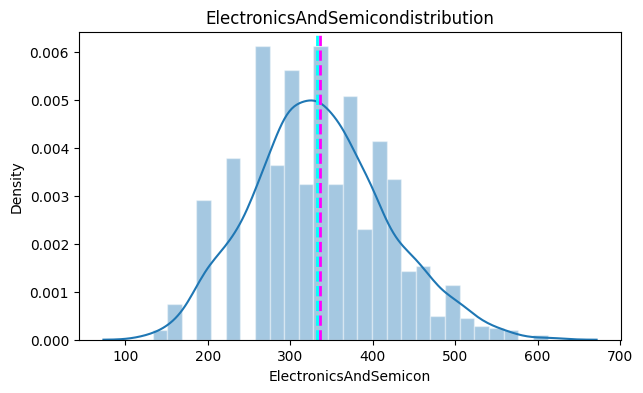

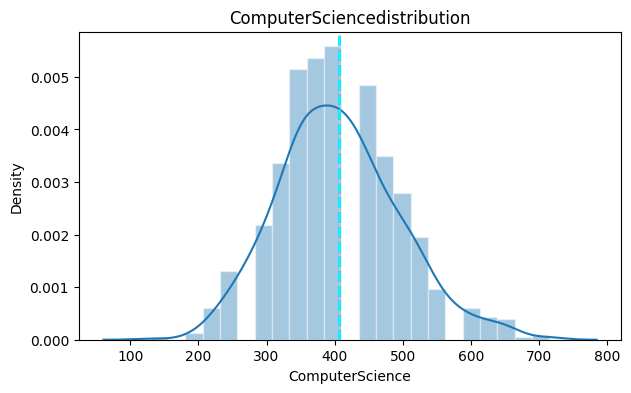

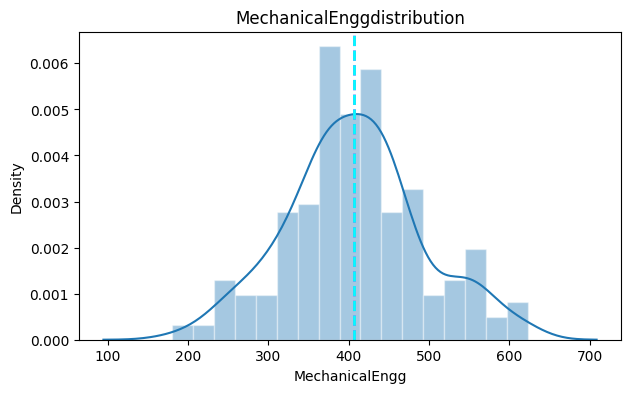

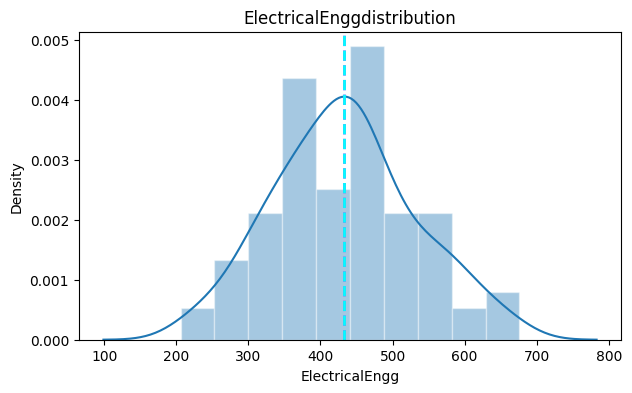

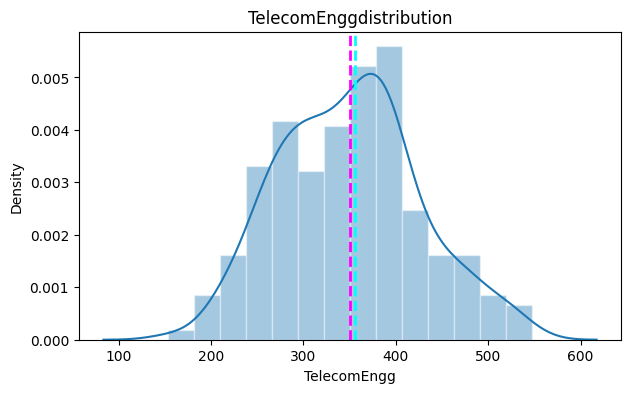

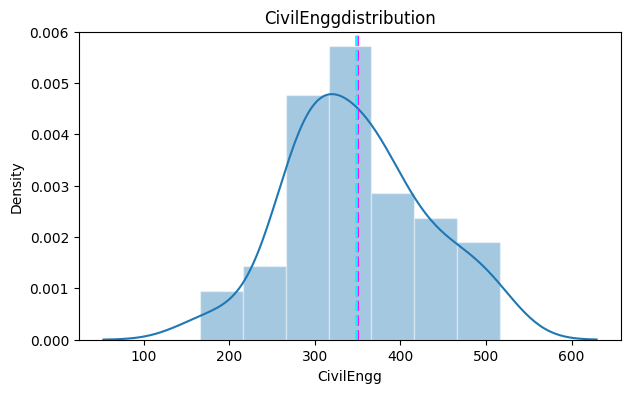

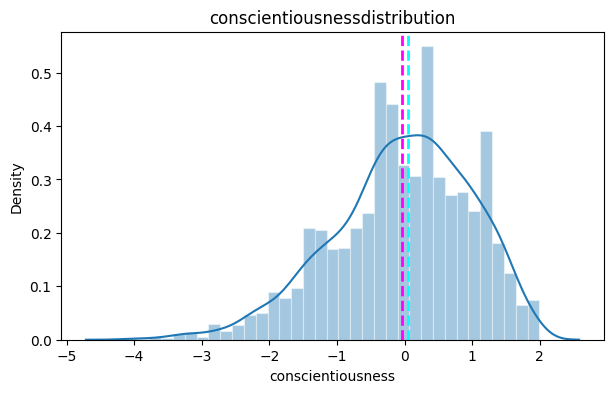

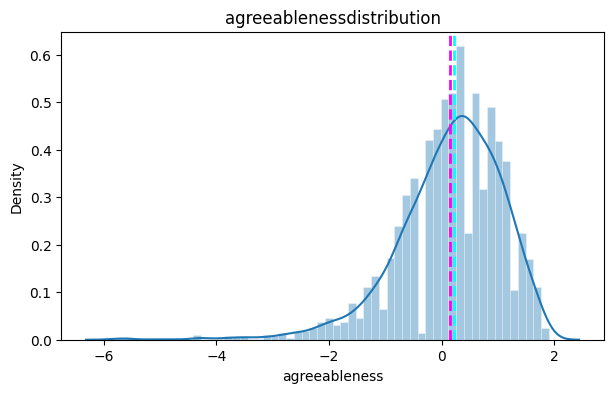

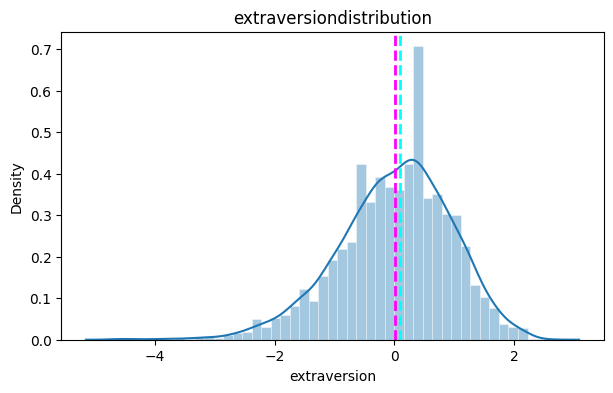

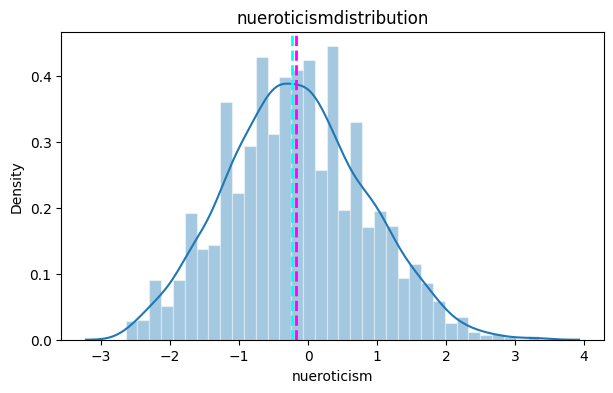

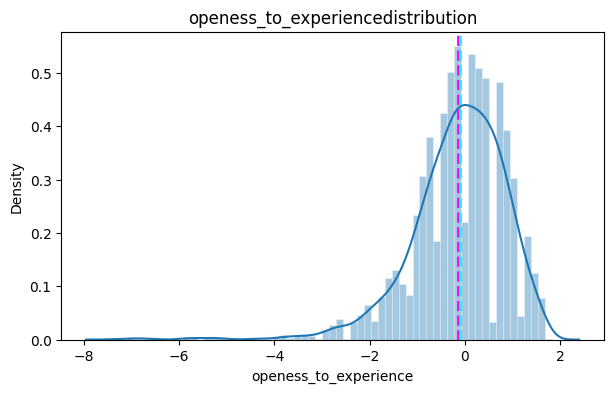

In [ ]:
# Chart visualization code
for col in dt[Num_data]:
  plt.figure(figsize=(7,4))
  sns.histplot(
      dt[col], kde=True,
      stat="density", kde_kws=dict(cut=3),
      alpha=.4, edgecolor=(1, 1, 1, .4),
      )
  plt.axvline(dt[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(dt[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col +'distribution')
  plt.show()

#####  What is/are the insight(s) found from the chart?

The insights or observations:
1. The salary distribution is the most skewed one and having a lot of outliers
2. Most of the other numerical varuables are normally distributed or with very less skewness.
3. We can remove outlier or transform our data to make it normal.

#### Chart - Countplot(Univariate) - Categorical

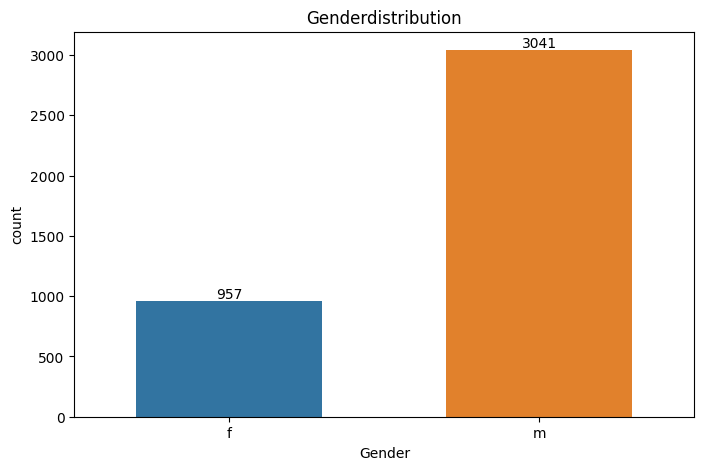

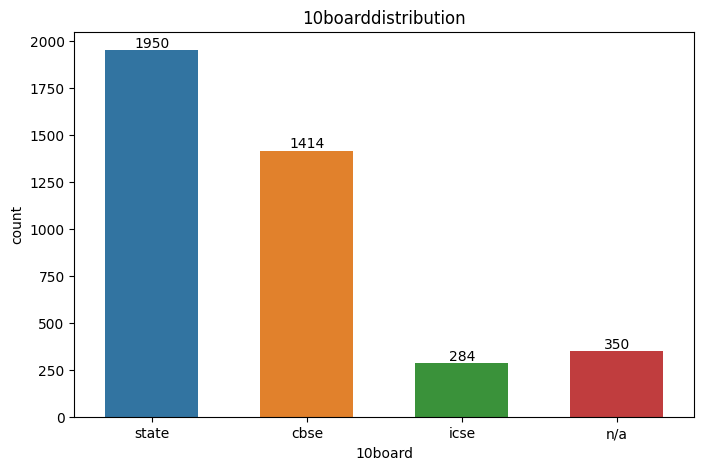

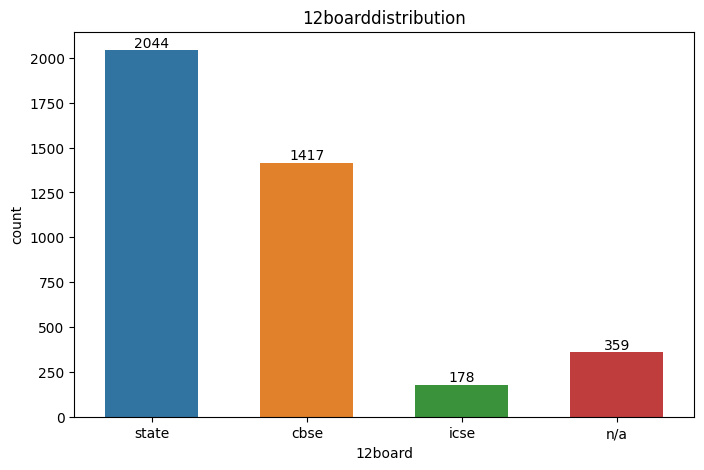

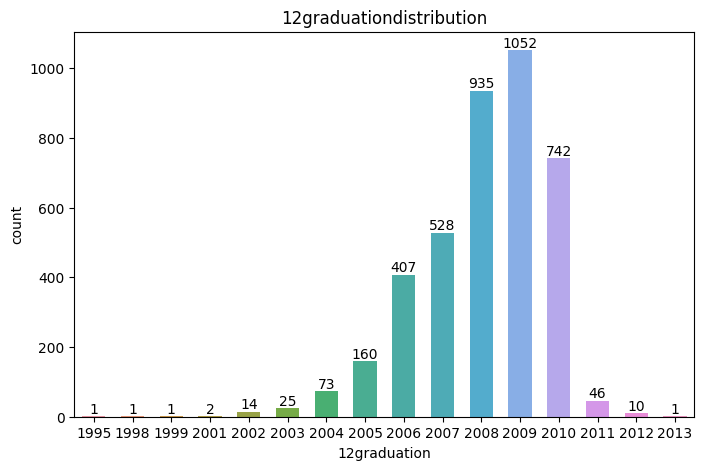

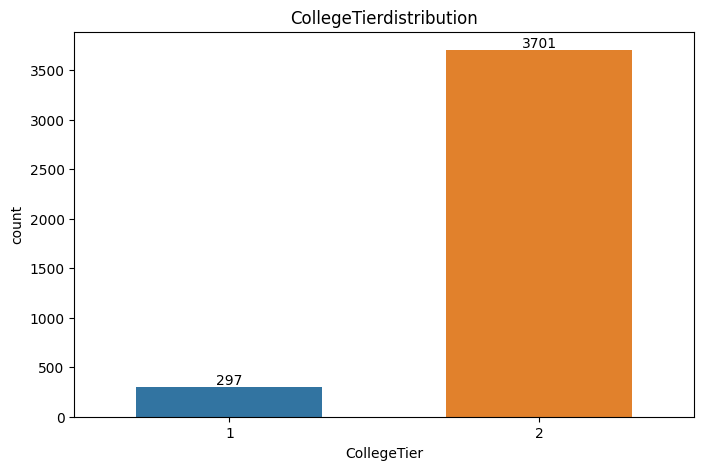

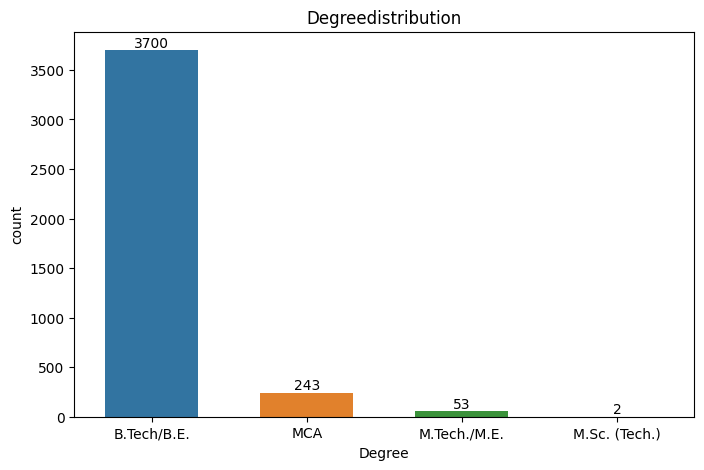

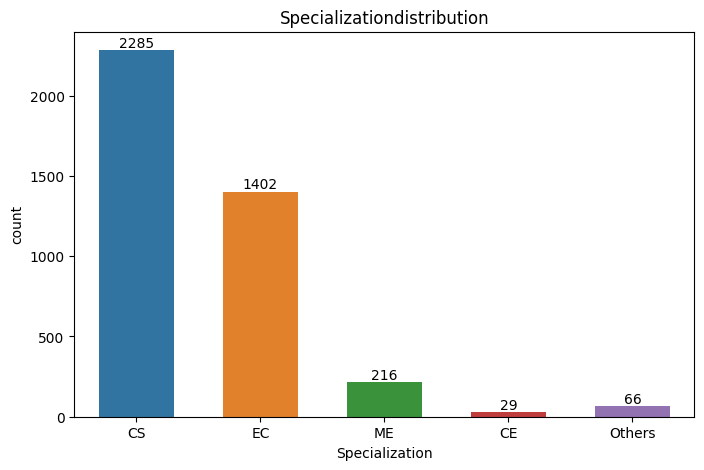

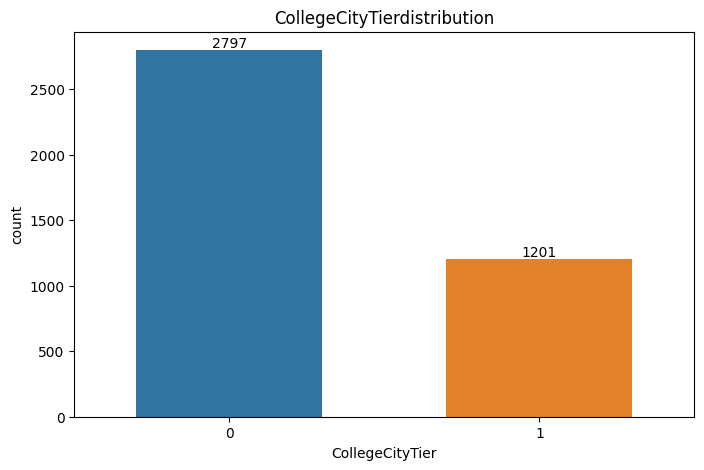

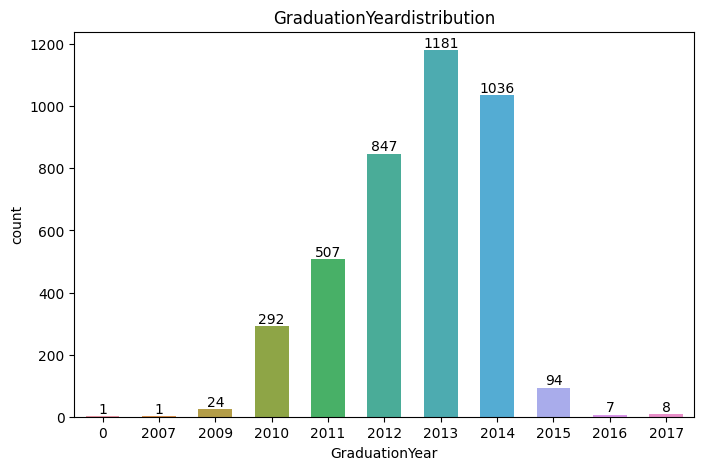

In [ ]:
# Chart visualization code
for col in dt[Cat_data]:
  plt.figure(figsize=(8,5))
  ax = sns.countplot(data=dt, x=col, width = 0.6)
  plt.xlabel(col)
  plt.title(col+'distribution')
  for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),ha='center', va='bottom')
  plt.show()

##### What is/are the insight(s) found from the chart?

The insights and observations are:
1. Male has 2 times more than female candidates
2. Most of the employees studied in CBSE board.
3. Maximum employed graduated their 12 in 2009 and similarly most of did thier graduation in 2013 i.e. 4 years of graduation.
4. Mostly are from the tier 2 college while 297 people are from tier 1 college, we can check their salary difference.
5. 3700 did their their graduation from Btech and most preferable braches are CSE and ECE.


#### Chart - Scatter plot( Num vs Num ) - Bivariate

In [ ]:
dt.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

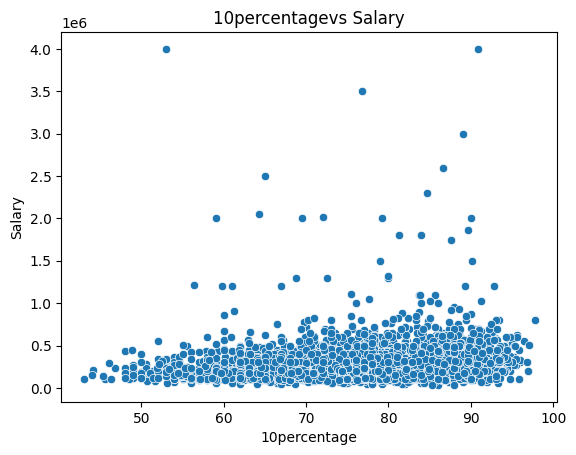

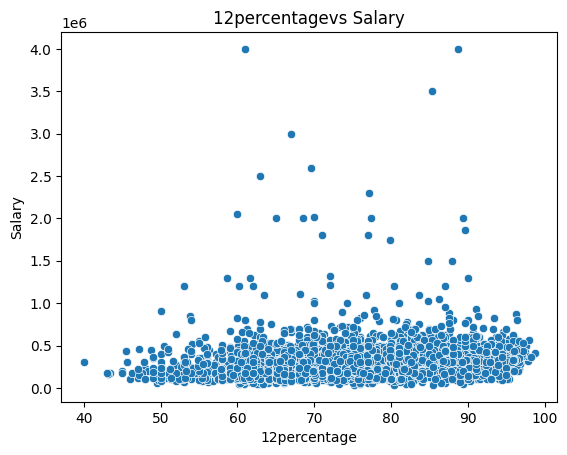

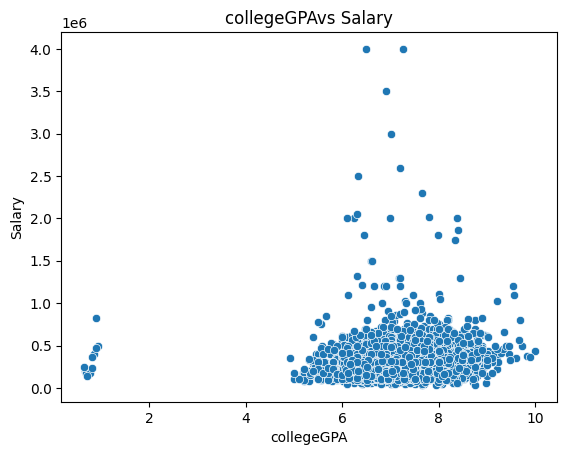

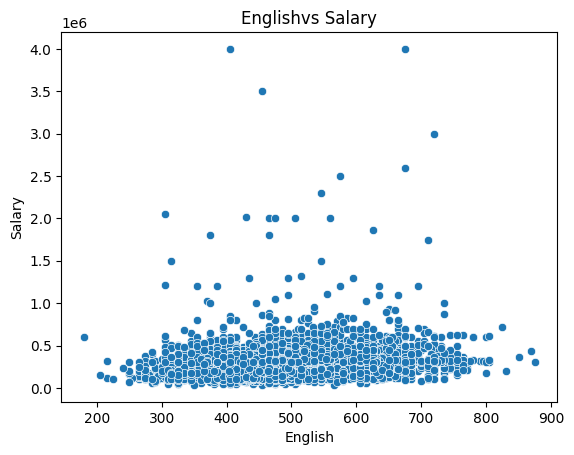

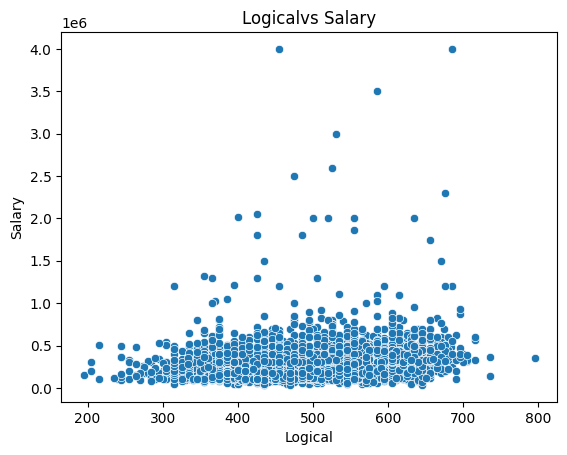

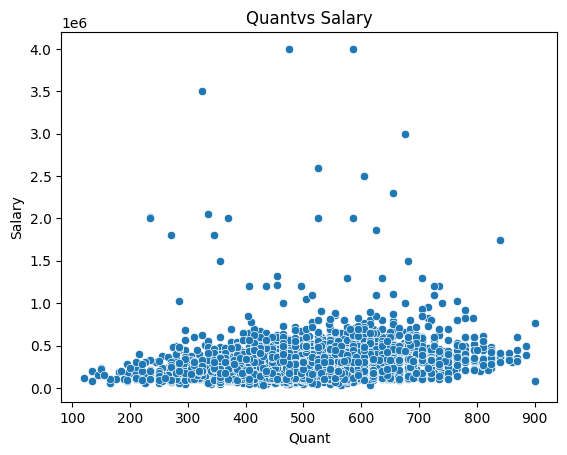

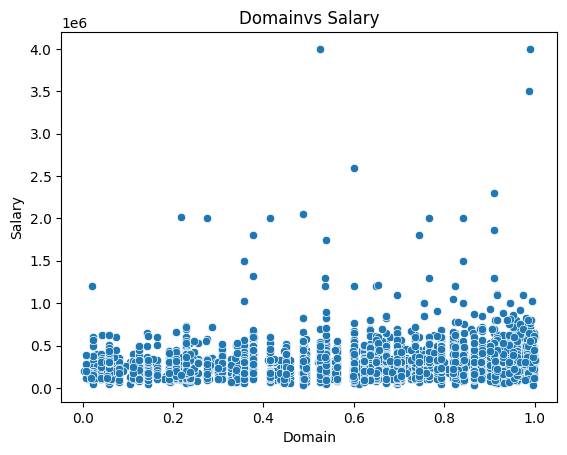

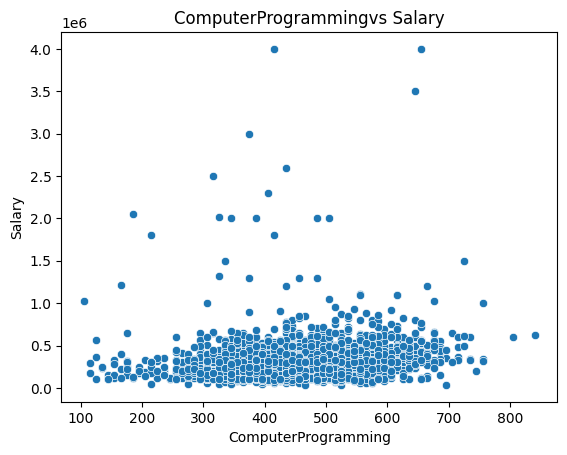

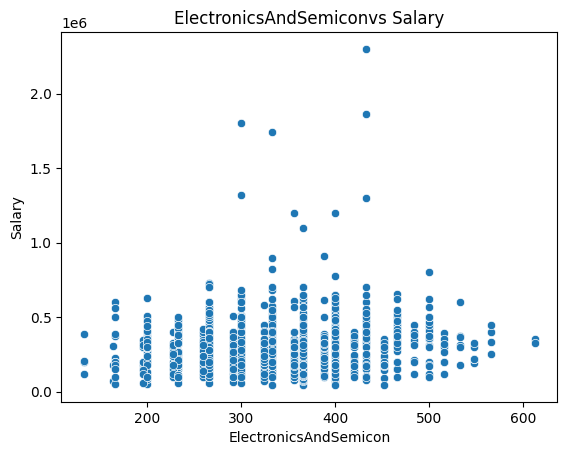

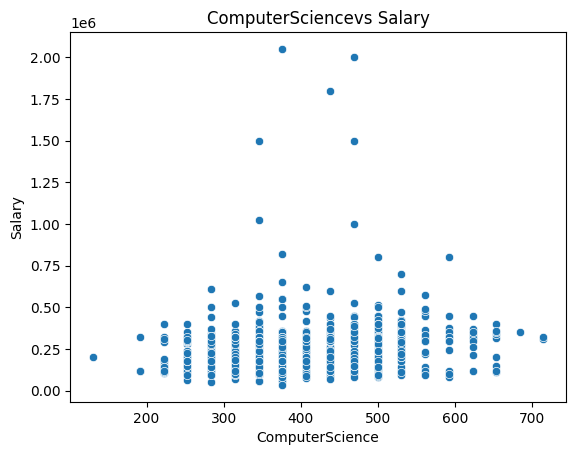

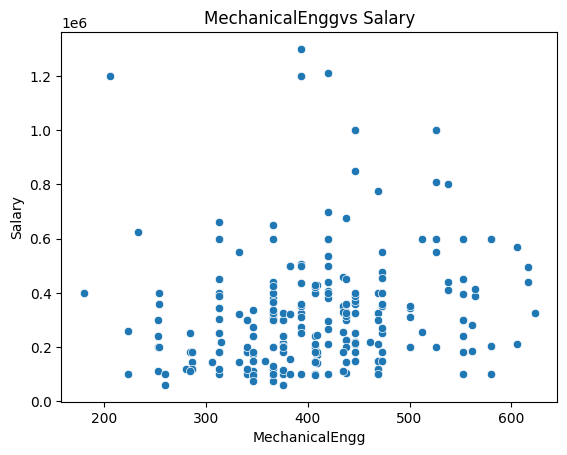

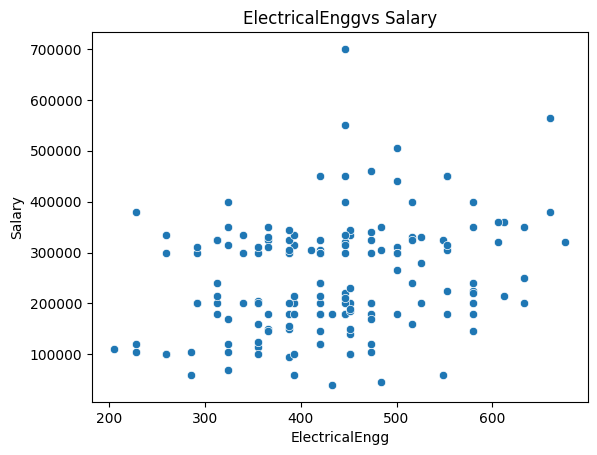

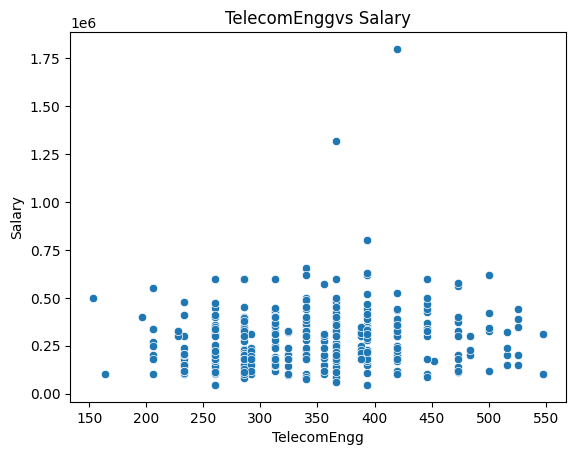

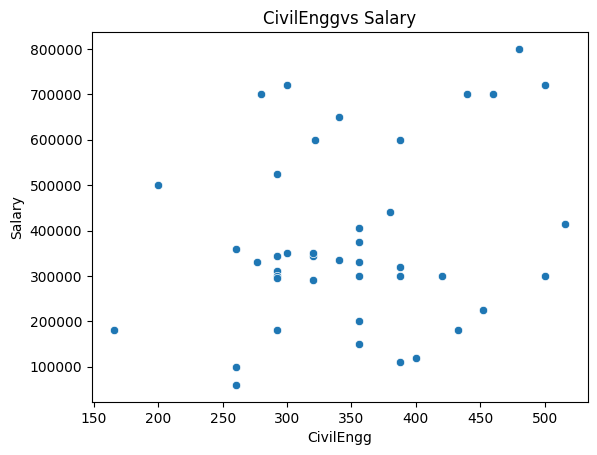

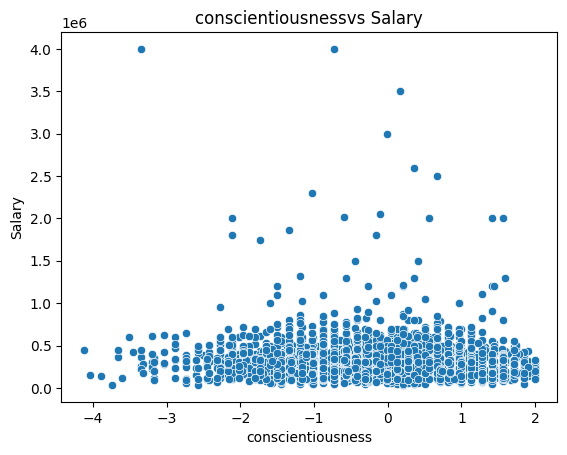

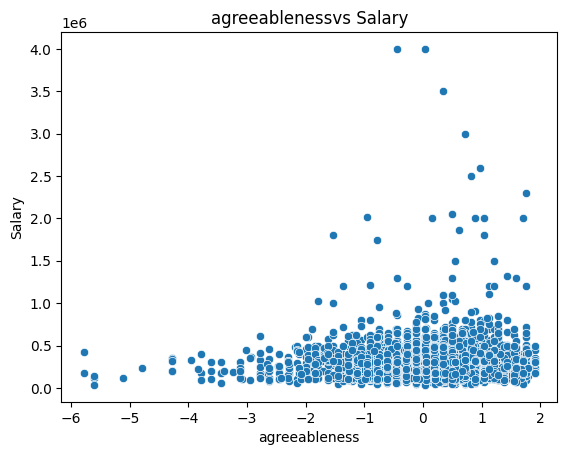

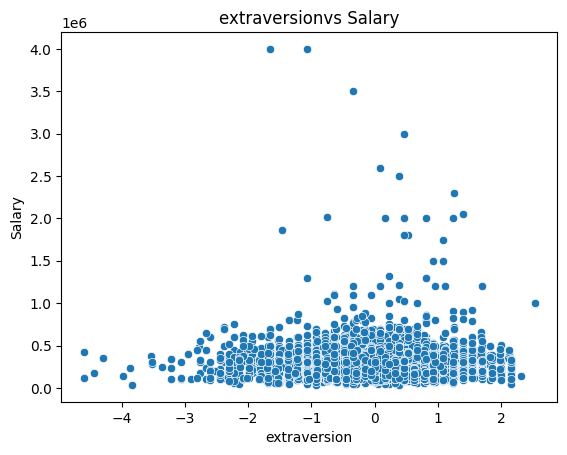

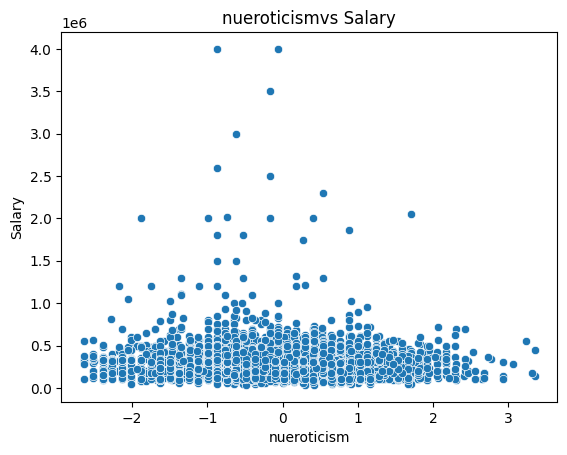

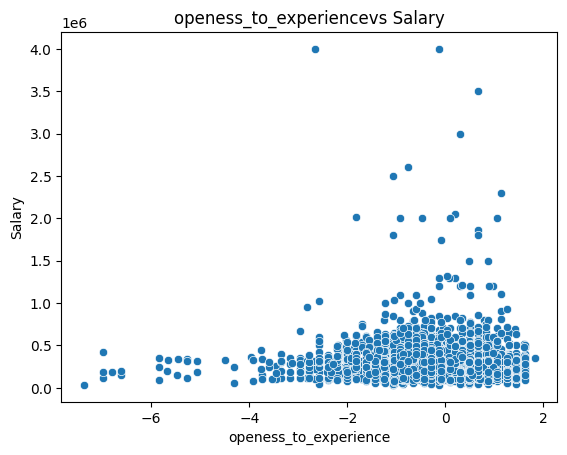

In [ ]:
# Chart visualization code

for col in dt[Continuous_var]:
  sns.scatterplot(data=dt, x=col, y='Salary')
  plt.xlabel(col)
  plt.ylabel('Salary')
  plt.title(col+'vs Salary')
  plt.show()

##### 2. What is/are the insight(s) found from the chart?

The insights we found from the scatter plot is that the salary does't affect with the marks you scored.
If we observe keenly, we had seen that people how are achieving average to good marks has good salaries then people having high marks. from this we can conclude that academic is not only the factor for getting higher salary job and many other factors to consider as well.

#### Chart - Box plot( Num vs Cat) - Bivariate

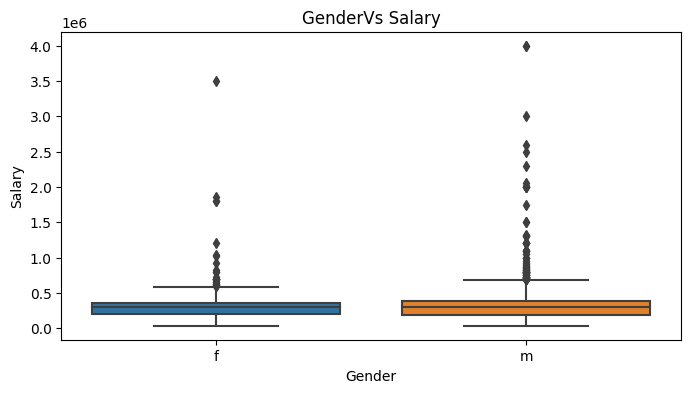

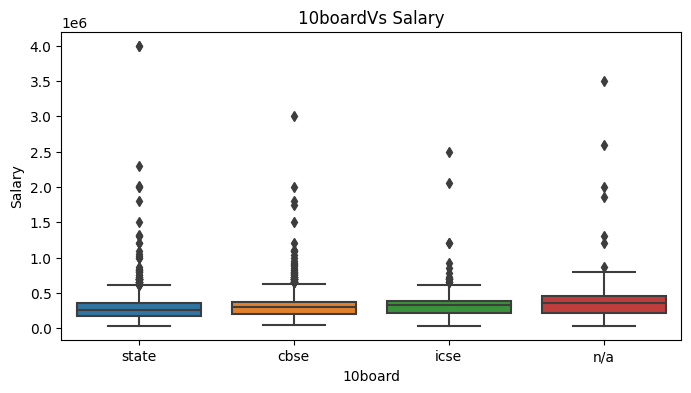

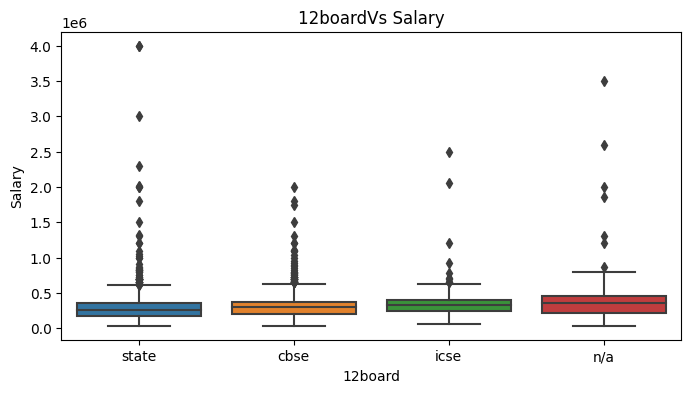

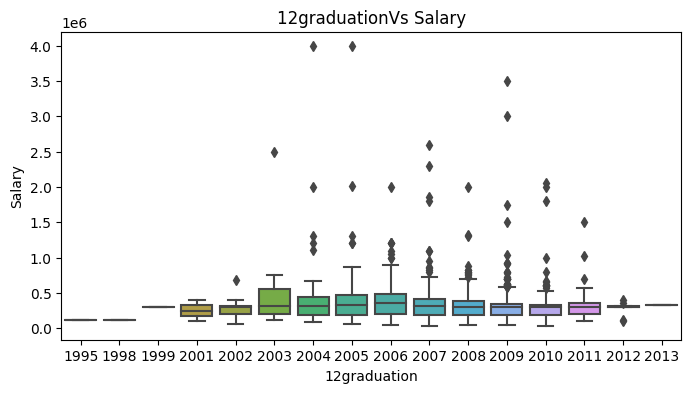

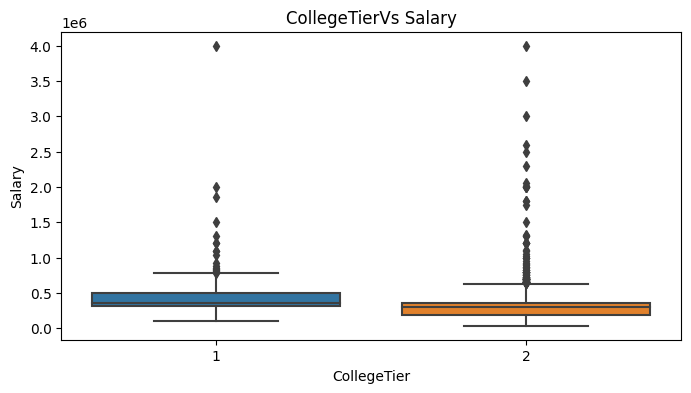

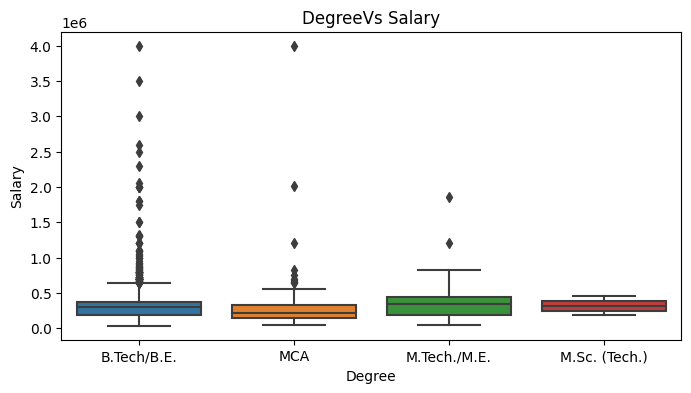

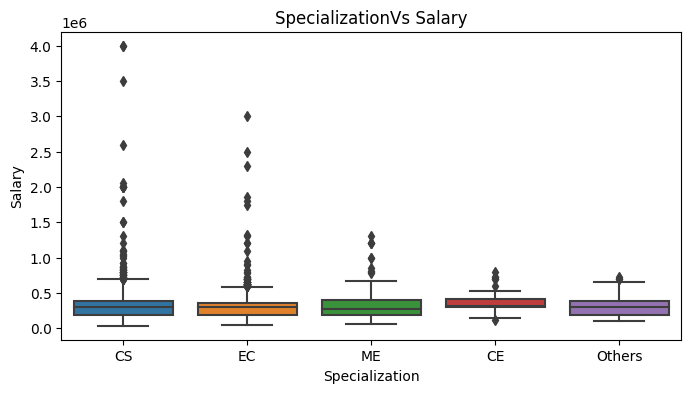

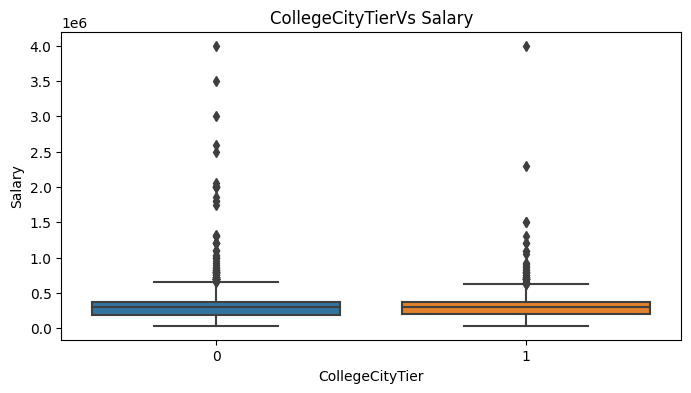

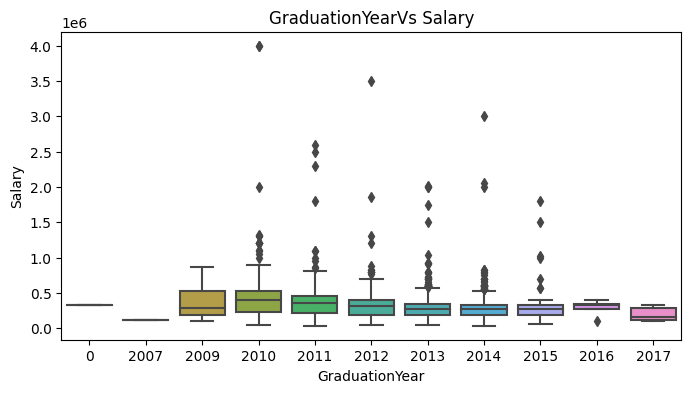

In [ ]:
# Chart  visualization code
for col in dt[Cat_data]:
  plt.figure(figsize=(8,4))
  sns.boxplot(y='Salary',x=col ,data=dt) 
  plt.xlabel(col)
  plt.ylabel('Salary')
  plt.title(col+'Vs Salary')
  plt.show()

##### What is/are the insight(s) found from the chart?

The average salary of all the categorical data are same . So we can conclude that the salary factory basically depends on the skills you develop and not any academic, how you studies and score. 

#### Chart - Scatterplot(Num Vs Num vs Cat) - Multivariate

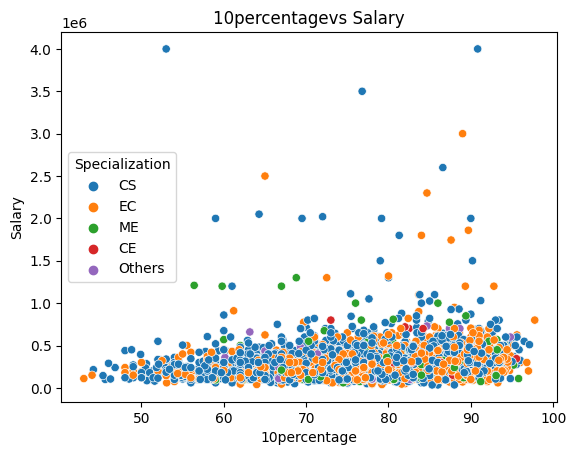

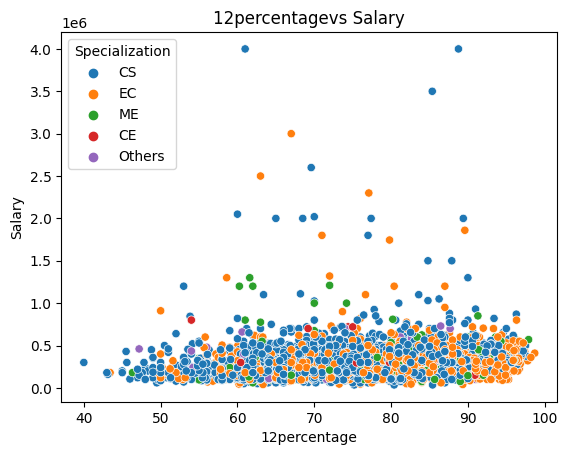

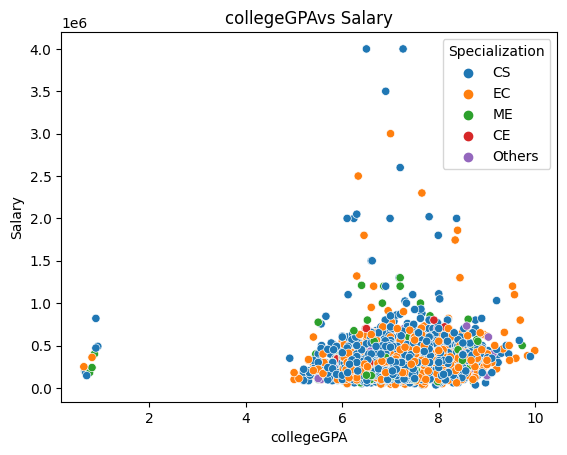

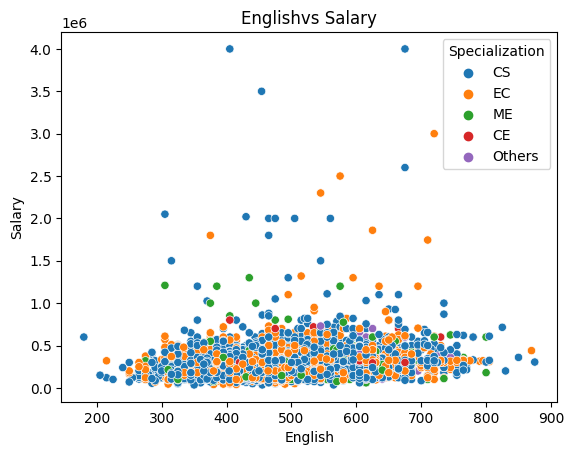

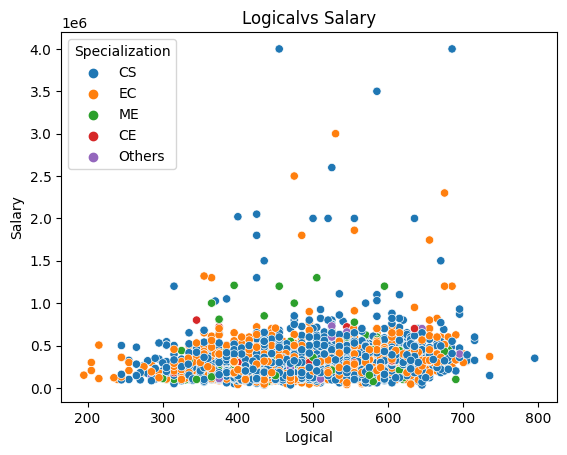

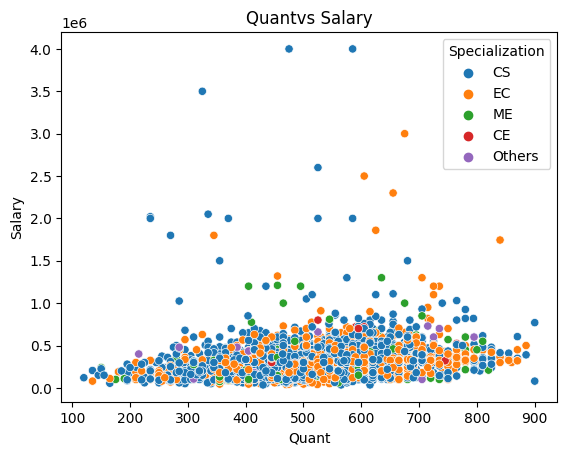

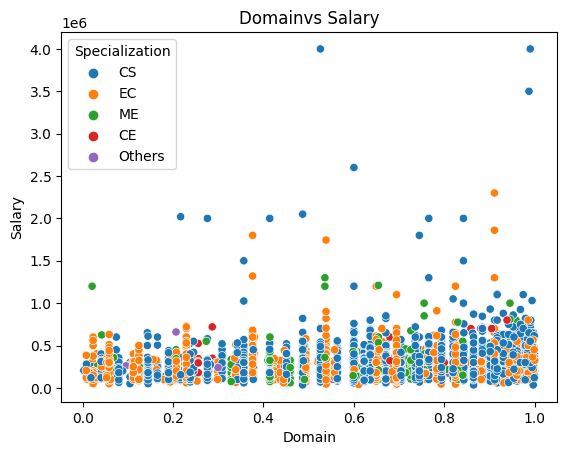

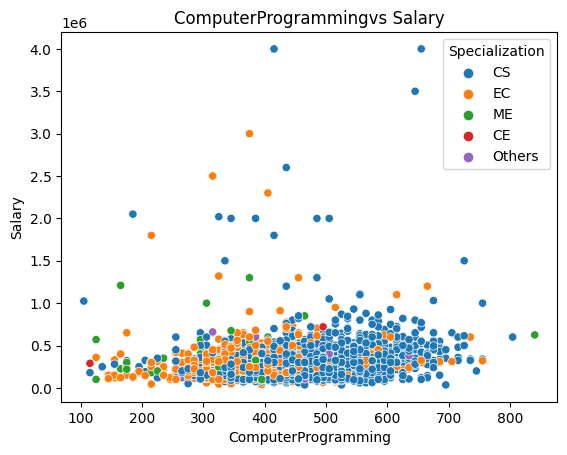

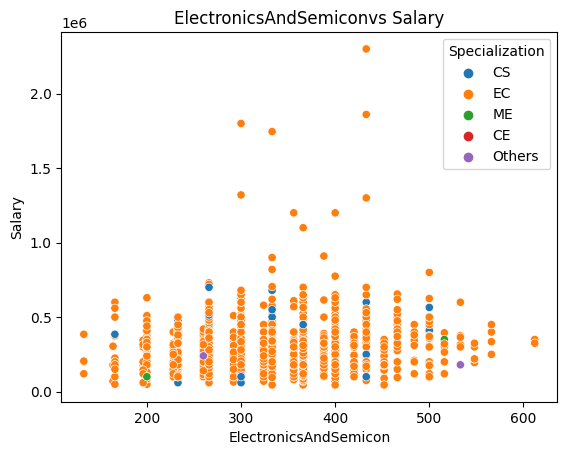

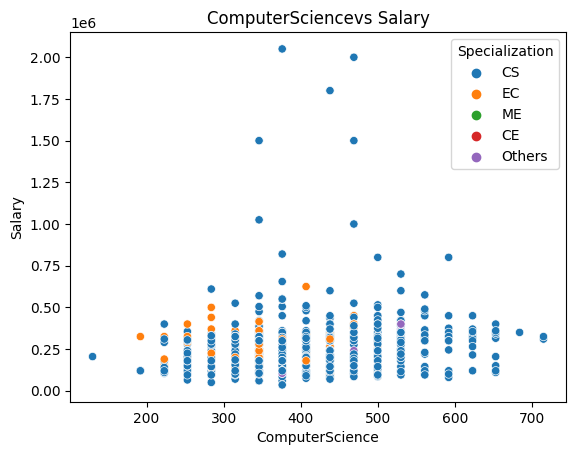

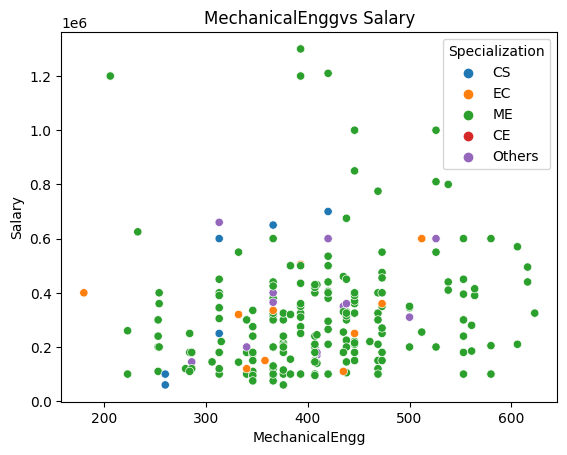

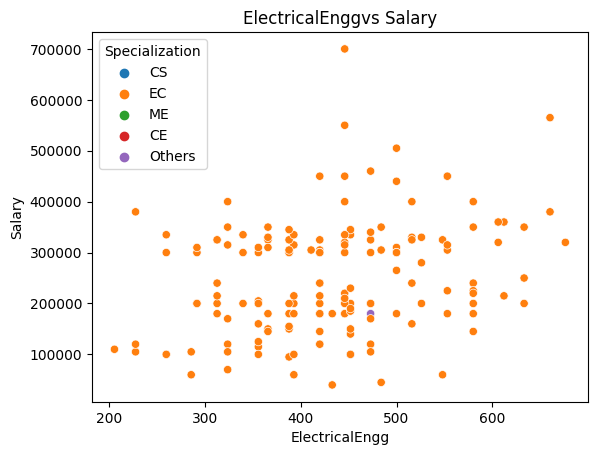

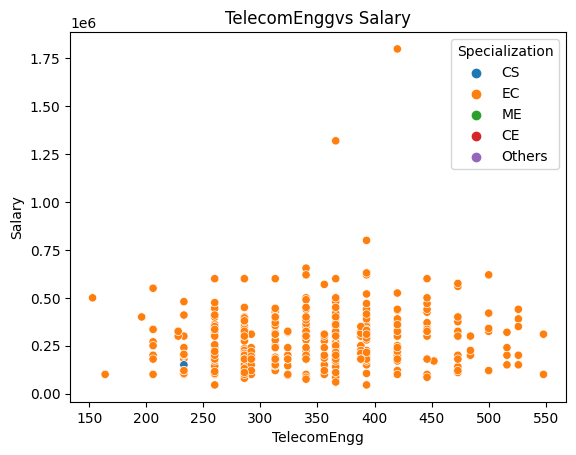

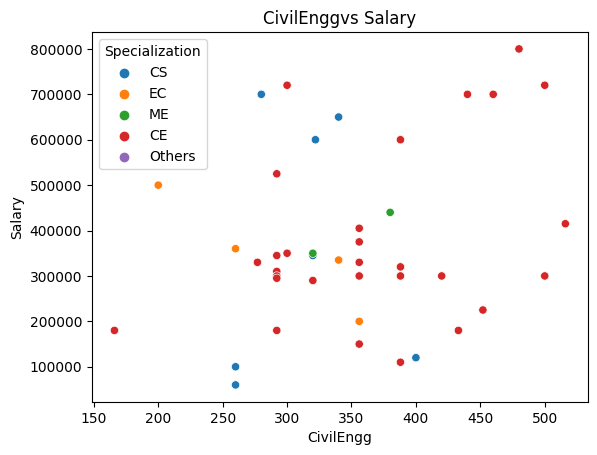

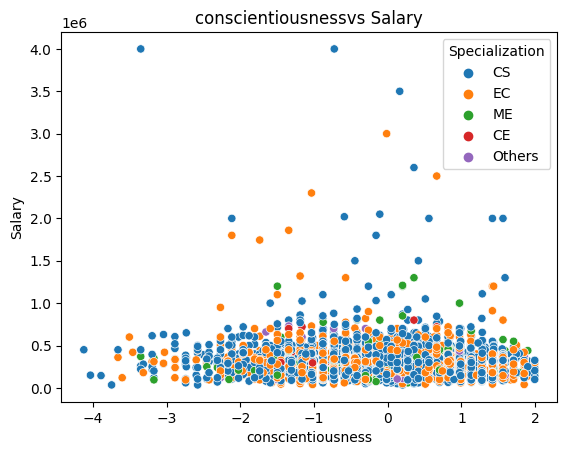

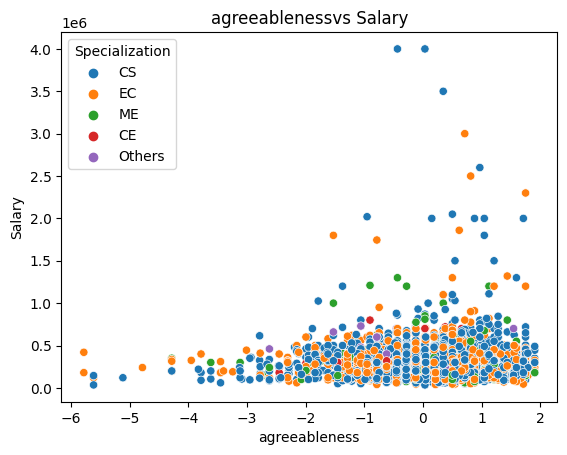

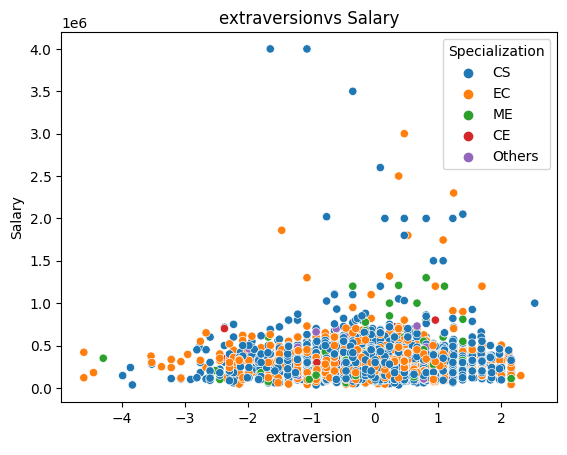

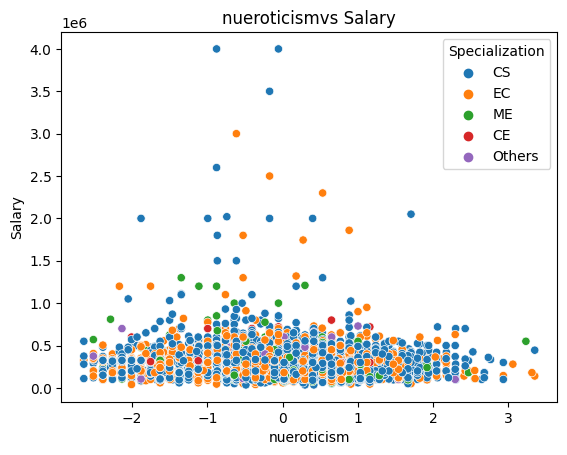

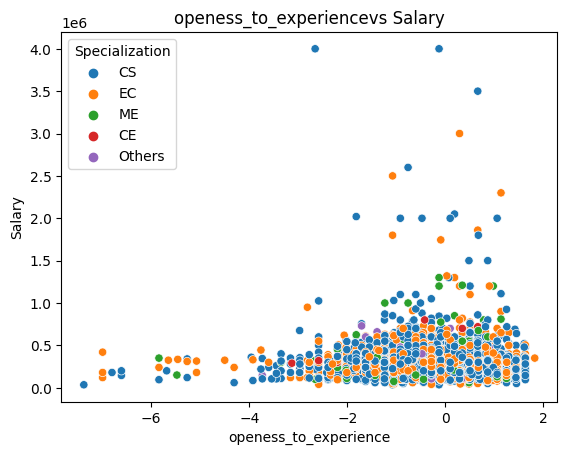

In [ ]:
# Chart visualization code
for col in dt[Continuous_var]:
  sns.scatterplot(data=dt, x=col, y='Salary', hue ='Specialization')
  plt.xlabel(col)
  plt.ylabel('Salary')
  plt.title(col+'vs Salary')
  plt.show()

##### What is/are the insight(s) found from the chart?

From this scatter chart, we can say that people taking CS and ECE has their salaries higher than any other brances taken.

In [ ]:
dt.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

#### Chart - Stackedbar chart

<Figure size 1000x500 with 0 Axes>

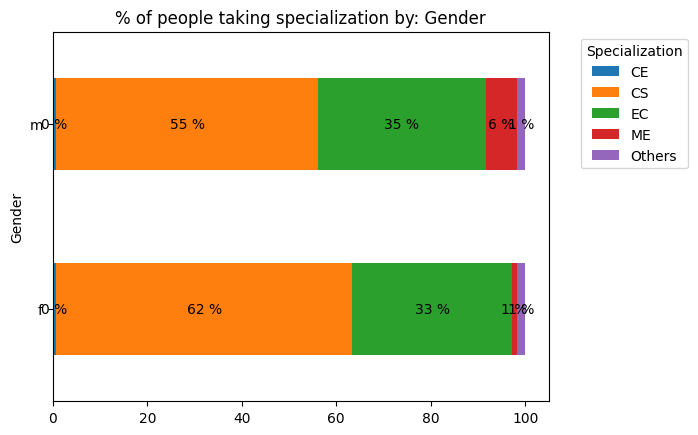

<Figure size 1000x500 with 0 Axes>

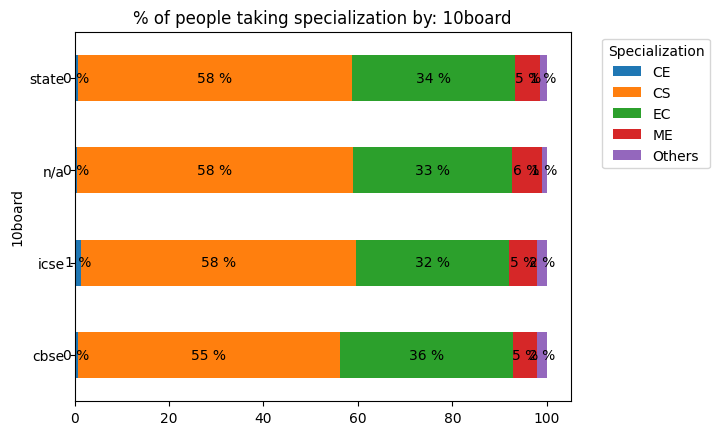

<Figure size 1000x500 with 0 Axes>

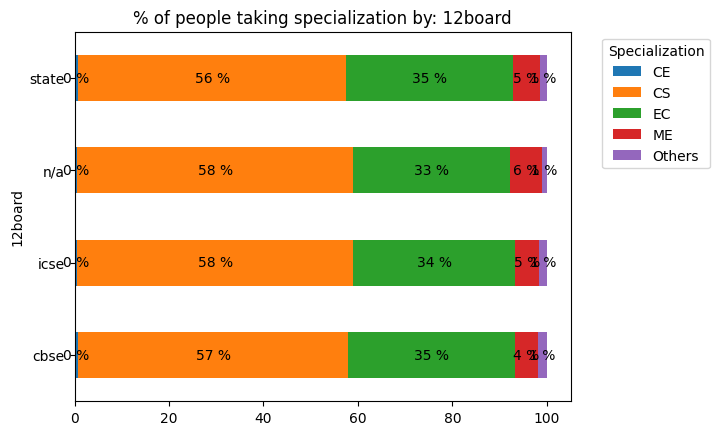

<Figure size 1000x500 with 0 Axes>

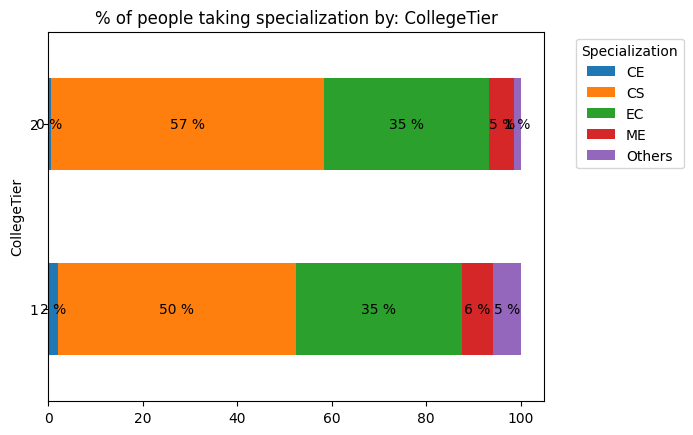

<Figure size 1000x500 with 0 Axes>

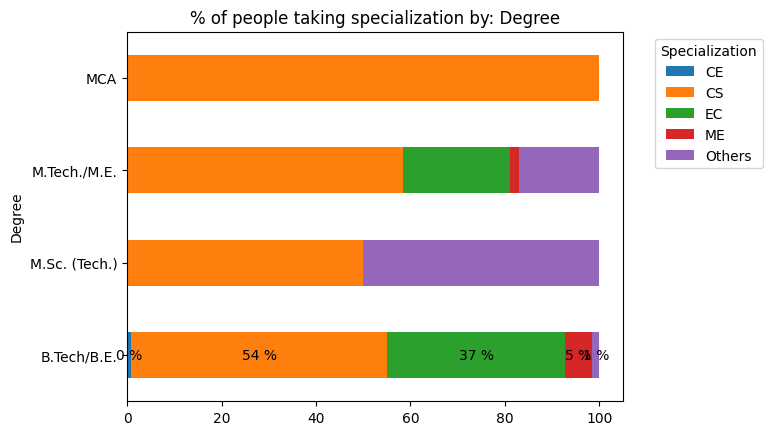

<Figure size 1000x500 with 0 Axes>

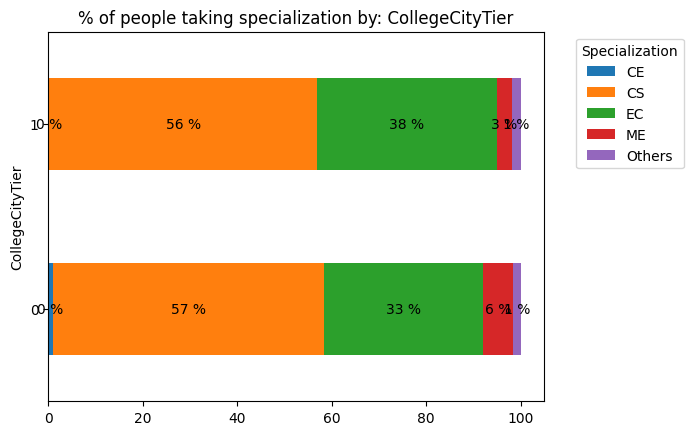

In [490]:
# Chart visualization code
for i in Cat_data:
    if i=='Specialization'or i=='12graduation'or i =='GraduationYear':
      continue
    x_var, y_var = i, 'Specialization'
    plt.figure(figsize=(10,5))
    df_grouped = dt.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of people taking specialization by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

##### What is/are the insight(s) found from the chart?

The insights are:
1. Females are more towards taking CS branch of 62% then male 55%.
2. All the other categories have equal distribution of students according to the specialization.

#### Chart - Correlation Heatmap

<ipython-input-393-e0853594660e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dt.corr()


<Axes: title={'center': 'Correlation Analysis'}>

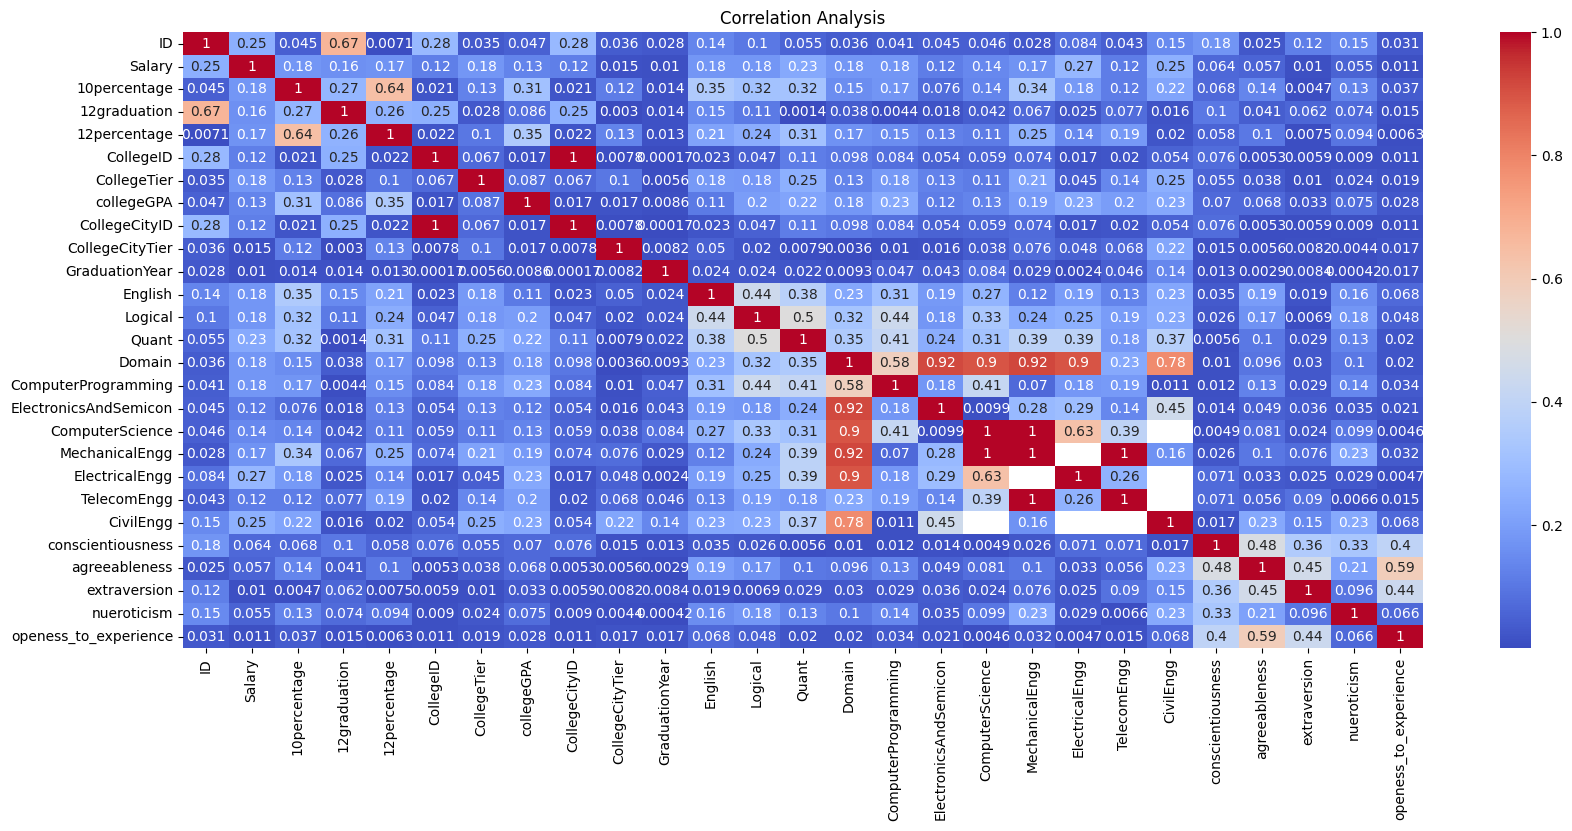

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,8))
plt.title('Correlation Analysis')
correlation = dt.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## ***5. Research Question***

In [ ]:
dt.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

-	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


In [ ]:
df_research = dt[((dt['Designation']=='programmer analyst') | (dt['Designation']=='software engineer') | (dt['Designation']=='hardware engineer') | (dt['Designation']=='associate engineer')) & (dt['GraduationYear']>=2014) &(dt['Specialization']=='CS')]

In [ ]:
df_research

ID  Salary        DOJ        DOL         Designation      JobCity  \
24     963123  335000 2014-06-01 2015-06-01  programmer analyst    Hyderabad   
31    1094324  340000 2014-08-01 2015-04-01   software engineer    Bangalore   
52     794209  400000 2015-04-01 2015-12-31   software engineer  Navi Mumbai   
55     989860  250000 2014-08-01 2015-12-31   software engineer    Mangalore   
93    1274522  325000 2014-10-01 2015-12-01   software engineer      Gurgaon   
...       ...     ...        ...        ...                 ...          ...   
3818  1089624  240000 2014-02-01 2015-12-31   software engineer       Mumbai   
3880  1233727  300000 2015-06-01 2015-12-31  programmer analyst      Gurgaon   
3881   982135  600000 2014-01-01 2015-12-31   software engineer    Bangalore   
3940  1100767  300000 2014-08-01 2015-12-31   software engineer      Chennai   
3989  1204604  300000 2014-09-01 2015-12-31   software engineer    Bangalore   

     Gender        DOB  10percentage 10board  ...  ComputerScience  \
24        m 1993-06-28         88.00   state  ...            346.0   
31        m 1992-10-23         77.20   state  ...            407.0   
52        m 1992-03-09         85.20    icse  ...              NaN   
55        m 1992-02-13         90.80   state  ...            376.0   
93        m 1992-03-31         70.00    icse  ...              NaN   
...     ...        ...           ...     ...  ...              ...   
3818      f 1991-09-08         73.80    cbse  ...            500.0   
3880      m 1994-06-30         81.00    cbse  ...            592.0   
3881      m 1992-01-31         80.40   state  ...            530.0   
3940      f 1993-08-01         81.00   state  ...            346.0   
3989      m 1991-11-23         74.88   state  ...            346.0   

      MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg conscientiousness  \
24               NaN            NaN          NaN        NaN            0.4155   
31               NaN            NaN          NaN        NaN           -0.0154   
52               NaN            NaN          NaN        NaN            1.1336   
55               NaN            NaN          NaN        NaN           -0.3027   
93               NaN            NaN          NaN        NaN            0.4155   
...              ...            ...          ...        ...               ...   
3818             NaN            NaN          NaN        NaN            0.1282   
3880             NaN            NaN          NaN        NaN           -1.3080   
3881             NaN            NaN          NaN        NaN           -0.3027   
3940             NaN            NaN          NaN        NaN            1.1336   
3989             NaN            NaN          NaN        NaN            0.1282   

     agreeableness  extraversion  nueroticism  openess_to_experience  
24          0.8027        0.1357      -0.9950                -0.6692  
31          1.2114        1.0859      -1.5021                 0.2889  
52          0.3789        1.0859       0.6530                 0.2889  
55          0.7119       -0.2974       1.1601                -0.4776  
93          0.3789       -0.9122      -1.1218                -0.8608  
...            ...           ...          ...                    ...  
3818        0.5454        0.3174      -0.2344                -0.2859  
3880        0.2124        1.3933       2.9349                 0.4805  
3881        0.0459        0.3174      -1.1218                -0.0943  
3940        0.3789       -0.4511       0.0192                 0.6721  
3989        0.0459        1.2396       1.0333                 0.6721  

[123 rows x 38 columns]

In [ ]:
df_research['Salary'].describe()

count    1.230000e+02
mean     3.470325e+05
std      1.756672e+05
min      8.500000e+04
25%      2.825000e+05
50%      3.150000e+05
75%      3.500000e+05
max      1.500000e+06
Name: Salary, dtype: float64

I had taken the data of graduates from 2014 and above

Since this Claim is false as we can see that most of the recent graduated earning more than 3 LPA while it ranges the amount from 85k to 15lpa and having an average of 3.5 lpa

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
dt.head().T

0                    1  \
ID                                      203097               579905   
Salary                                  420000               500000   
DOJ                        2012-06-01 00:00:00  2013-09-01 00:00:00   
DOL                        2015-12-31 00:00:00  2015-12-31 00:00:00   
Designation            senior quality engineer    assistant manager   
JobCity                              Bangalore               Indore   
Gender                                       f                    m   
DOB                        1990-02-19 00:00:00  1989-10-04 00:00:00   
10percentage                              84.3                 85.4   
10board                                  state                 cbse   
12graduation                              2007                 2007   
12percentage                              95.8                 85.0   
12board                                  state                 cbse   
CollegeID                                 1141                 5807   
CollegeTier                                  2                    2   
Degree                             B.Tech/B.E.          B.Tech/B.E.   
Specialization                              CS                   EC   
collegeGPA                                 7.8                 7.01   
CollegeCityID                             1141                 5807   
CollegeCityTier                              0                    0   
CollegeState                    Andhra Pradesh       Madhya Pradesh   
GraduationYear                            2011                 2012   
English                                    515                  695   
Logical                                    585                  610   
Quant                                      525                  780   
Domain                                0.635979             0.960603   
ComputerProgramming                      445.0                  NaN   
ElectronicsAndSemicon                      NaN                466.0   
ComputerScience                            NaN                  NaN   
MechanicalEngg                             NaN                  NaN   
ElectricalEngg                             NaN                  NaN   
TelecomEngg                                NaN                  NaN   
CivilEngg                                  NaN                  NaN   
conscientiousness                       0.9737              -0.7335   
agreeableness                           0.8128               0.3789   
extraversion                            0.5269               1.2396   
nueroticism                             1.3549              -0.1076   
openess_to_experience                  -0.4455               0.8637   

                                         2                         3  \
ID                                  810601                    267447   
Salary                              325000                   1100000   
DOJ                    2014-06-01 00:00:00       2011-07-01 00:00:00   
DOL                    2015-12-31 00:00:00       2015-12-31 00:00:00   
Designation               systems engineer  senior software engineer   
JobCity                            Chennai                   Gurgaon   
Gender                                   f                         m   
DOB                    1992-08-03 00:00:00       1989-12-05 00:00:00   
10percentage                          85.0                      85.6   
10board                               cbse                      cbse   
12graduation                          2010                      2007   
12percentage                          68.2                      83.6   
12board                               cbse                      cbse   
CollegeID                               64                      6920   
CollegeTier                              2                         1   
Degree                         B.Tech/B.E.               B.Tech/B.E.   
Specialization                          CS         

In [ ]:
df2 = dt.copy()

In [ ]:
df2.head().T

0                    1  \
ID                                      203097               579905   
Salary                                  420000               500000   
DOJ                        2012-06-01 00:00:00  2013-09-01 00:00:00   
DOL                        2015-12-31 00:00:00  2015-12-31 00:00:00   
Designation            senior quality engineer    assistant manager   
JobCity                              Bangalore               Indore   
Gender                                       f                    m   
DOB                        1990-02-19 00:00:00  1989-10-04 00:00:00   
10percentage                              84.3                 85.4   
10board                                  state                 cbse   
12graduation                              2007                 2007   
12percentage                              95.8                 85.0   
12board                                  state                 cbse   
CollegeID                                 1141                 5807   
CollegeTier                                  2                    2   
Degree                             B.Tech/B.E.          B.Tech/B.E.   
Specialization                              CS                   EC   
collegeGPA                                 7.8                 7.01   
CollegeCityID                             1141                 5807   
CollegeCityTier                              0                    0   
CollegeState                    Andhra Pradesh       Madhya Pradesh   
GraduationYear                            2011                 2012   
English                                    515                  695   
Logical                                    585                  610   
Quant                                      525                  780   
Domain                                0.635979             0.960603   
ComputerProgramming                      445.0                  NaN   
ElectronicsAndSemicon                      NaN                466.0   
ComputerScience                            NaN                  NaN   
MechanicalEngg                             NaN                  NaN   
ElectricalEngg                             NaN                  NaN   
TelecomEngg                                NaN                  NaN   
CivilEngg                                  NaN                  NaN   
conscientiousness                       0.9737              -0.7335   
agreeableness                           0.8128               0.3789   
extraversion                            0.5269               1.2396   
nueroticism                             1.3549              -0.1076   
openess_to_experience                  -0.4455               0.8637   

                                         2                         3  \
ID                                  810601                    267447   
Salary                              325000                   1100000   
DOJ                    2014-06-01 00:00:00       2011-07-01 00:00:00   
DOL                    2015-12-31 00:00:00       2015-12-31 00:00:00   
Designation               systems engineer  senior software engineer   
JobCity                            Chennai                   Gurgaon   
Gender                                   f                         m   
DOB                    1992-08-03 00:00:00       1989-12-05 00:00:00   
10percentage                          85.0                      85.6   
10board                               cbse                      cbse   
12graduation                          2010                      2007   
12percentage                          68.2                      83.6   
12board                               cbse                      cbse   
CollegeID                               64                      6920   
CollegeTier                              2                         1   
Degree                         B.Tech/B.E.               B.Tech/B.E.   
Specialization                          CS         

In [ ]:
df2.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [ ]:
# we can remove Certain columns which don't contributes to our Dependent variable 'Salary'
df2 = df2.drop(['ID', 'Designation', 'JobCity', '10board', '12board', 'CollegeID', 'CollegeCityID', 'CollegeCityTier', 'CollegeState'],axis =1)

In [ ]:
# creating new Columns
df2['Exp'] =  df2['DOL'] - df2['DOJ']
df2['Exp'] = round(df2['Exp'].dt.days/365,2)
df2['Exp'] = df2['Exp'].astype(int)

In [ ]:
df2 = df2[df2['Exp']<15]

In [ ]:
df2['Age(on_join)'] = df2['DOJ'] - df2['DOB']
df2['Age(on_join)'] = round(df2['Age(on_join)'].dt.days/365,2)
df2['Age(on_join)'] = df2['Age(on_join)'].astype(int)

In [ ]:
df2 = df2[df2['Age(on_join)'] > 15]

In [ ]:
df2.head()

Salary        DOJ        DOL Gender        DOB  10percentage  \
0   420000 2012-06-01 2015-12-31      f 1990-02-19          84.3   
1   500000 2013-09-01 2015-12-31      m 1989-10-04          85.4   
2   325000 2014-06-01 2015-12-31      f 1992-08-03          85.0   
3  1100000 2011-07-01 2015-12-31      m 1989-12-05          85.6   
4   200000 2014-03-01 2015-03-01      m 1991-02-27          78.0   

   12graduation  12percentage  CollegeTier       Degree  ... ElectricalEngg  \
0          2007          95.8            2  B.Tech/B.E.  ...            NaN   
1          2007          85.0            2  B.Tech/B.E.  ...            NaN   
2          2010          68.2            2  B.Tech/B.E.  ...            NaN   
3          2007          83.6            1  B.Tech/B.E.  ...            NaN   
4          2008          76.8            2  B.Tech/B.E.  ...            NaN   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0          NaN        NaN             0.9737         0.8128        0.5269   
1          NaN        NaN            -0.7335         0.3789        1.2396   
2          NaN        NaN             0.2718         1.7109        0.1637   
3          NaN        NaN             0.0464         0.3448       -0.3440   
4          NaN        NaN            -0.8810        -0.2793       -1.0697   

   nueroticism  openess_to_experience  Exp  Age(on_join)  
0      1.35490                -0.4455    3            22  
1     -0.10760                 0.8637    2            23  
2     -0.86820                 0.6721    1            21  
3     -0.40780                -0.9194    4            21  
4      0.09163                -0.1295    1            23  

[5 rows x 31 columns]

In [ ]:
df2.columns

Index(['Salary', 'DOJ', 'DOL', 'Gender', 'DOB', '10percentage', '12graduation',
       '12percentage', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Exp', 'Age(on_join)'],
      dtype='object')

In [ ]:
df2 = df2.drop(['DOJ','DOL','DOB','GraduationYear','12graduation'],axis =1)

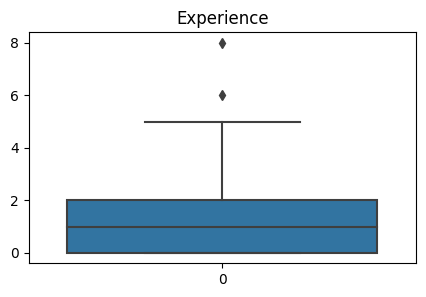

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(df2['Exp']) 
plt.title('Experience')
plt.show()

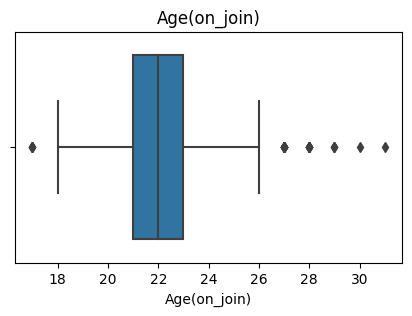

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Age(on_join)',data=df2) 
plt.title('Age(on_join)')
plt.show()

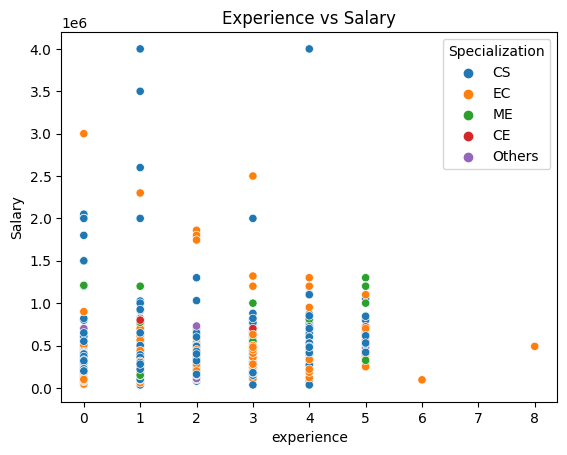

In [ ]:
sns.scatterplot(data=df2, x='Exp', y='Salary', hue='Specialization')
plt.xlabel('experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

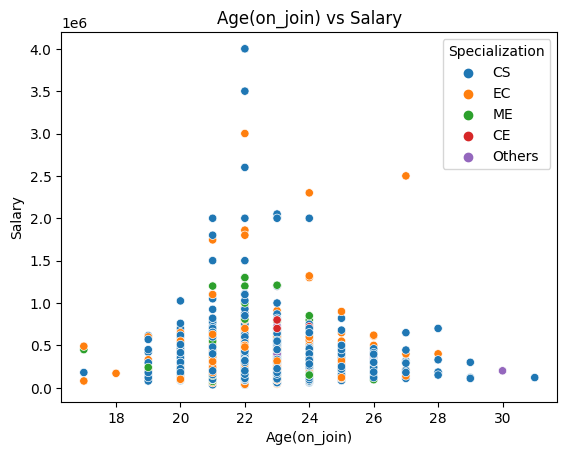

In [ ]:
sns.scatterplot(data=df2, x='Age(on_join)', y='Salary',hue='Specialization')
plt.xlabel('Age(on_join)')
plt.ylabel('Salary')
plt.title('Age(on_join) vs Salary')
plt.show()

1. Most of the people are in the range of 20 to 30 years of age at the time of joining.
2. Most has an experience of 0 to 5 years in job.
3. Salary levels of all the people are varied and doesn't much depends on the experience they hold maybe due to different profiles or maybe people joining the job later.
4. The people that are having to high salary job are belonging mostly to CS specialization followed by ECE.

### Handling Outliers

In [ ]:
df2.shape

(3996, 26)

In [ ]:
df2.Salary.describe()

count    3.996000e+03
mean     3.076124e+05
std      2.127341e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

In [ ]:
# Handling Outliers & Outlier treatments
df2 = df2[df2['Salary']< 2000000]

In [ ]:
df2.shape

(3983, 26)

<Axes: >

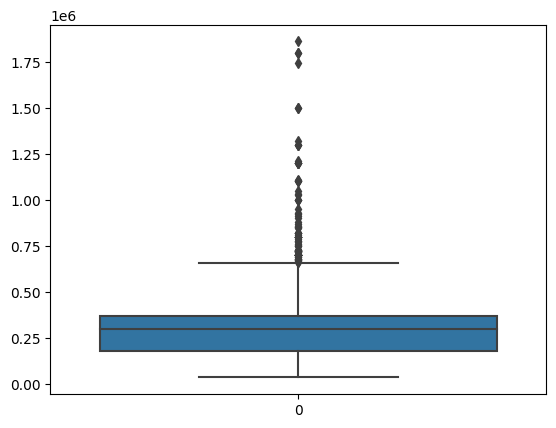

In [ ]:
sns.boxplot(df2['Salary'])

In [ ]:
df2.Salary.describe()

count    3.983000e+03
mean     3.000876e+05
std      1.619256e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      1.860000e+06
Name: Salary, dtype: float64

In [ ]:
df2.columns

Index(['Salary', 'Gender', '10percentage', '12percentage', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Exp', 'Age(on_join)'],
      dtype='object')

In [ ]:
l_skew = ['collegeGPA','agreeableness','openess_to_experience']

In [ ]:
df2[l_skew].describe()

collegeGPA  agreeableness  openess_to_experience
count  3990.000000    3990.000000            3990.000000
mean      7.148975       0.147158              -0.136506
std       0.817367       0.941126               1.007065
min       0.640000      -5.781600              -7.375700
25%       6.640000      -0.287100              -0.669200
50%       7.170000       0.212400              -0.094300
75%       7.640000       0.812800               0.502400
max       9.990000       1.904800               1.822400

In [ ]:
df2 = df2[df2['collegeGPA'] > 1]

In [ ]:
df2 = df2[df2['agreeableness'] > -2.5]

In [ ]:
df2 = df2[df2['openess_to_experience'] > -3]

<ipython-input-476-a23e15117282>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[i])


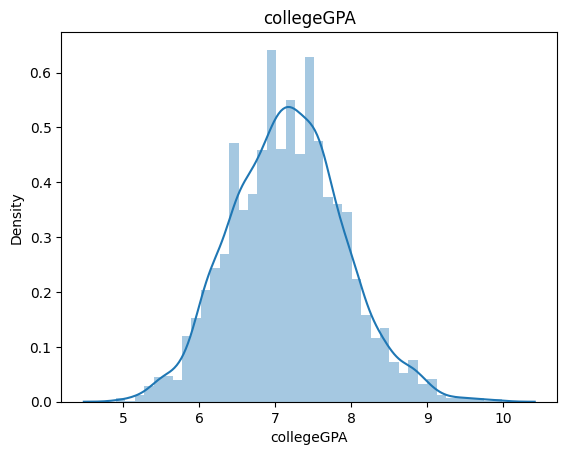

<ipython-input-476-a23e15117282>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[i])


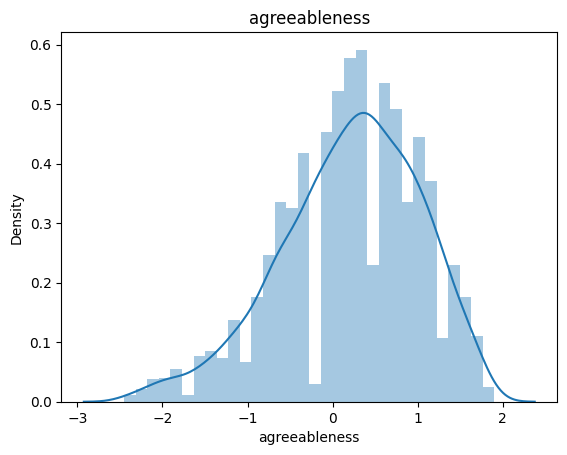

<ipython-input-476-a23e15117282>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[i])


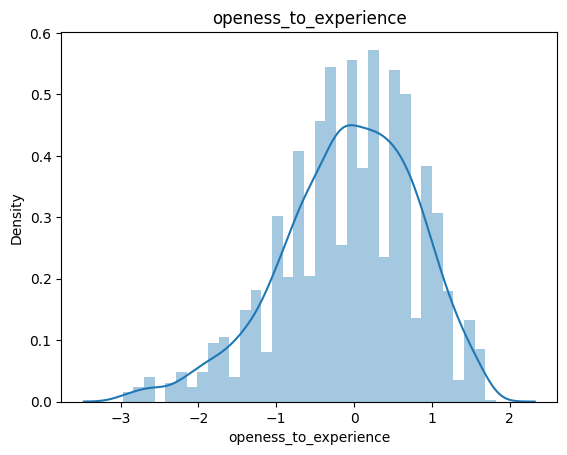

In [ ]:
for i in l_skew:
  sns.distplot(df2[i])
  plt.title(i)
  plt.show()

In [ ]:
df2.shape

(3900, 26)

In [ ]:
df2[l_skew].describe()

collegeGPA  agreeableness  openess_to_experience
count  3900.000000    3900.000000            3900.000000
mean      7.170323       0.205628              -0.073675
std       0.738439       0.825173               0.868686
min       4.910000      -2.451600              -2.973100
25%       6.660000      -0.287100              -0.603500
50%       7.180000       0.266800               0.028400
75%       7.640000       0.812800               0.502400
max       9.990000       1.904800               1.822400

In [ ]:
clean_data = df2.copy()

In [ ]:
clean_data.head().T

0            1            2            3  \
Salary                      420000       500000       325000      1100000   
Gender                           f            m            f            m   
10percentage                  84.3         85.4         85.0         85.6   
12percentage                  95.8         85.0         68.2         83.6   
CollegeTier                      2            2            2            1   
Degree                 B.Tech/B.E.  B.Tech/B.E.  B.Tech/B.E.  B.Tech/B.E.   
Specialization                  CS           EC           CS           CS   
collegeGPA                     7.8         7.01          7.0         7.46   
English                        515          695          615          635   
Logical                        585          610          545          585   
Quant                          525          780          370          625   
Domain                    0.635979     0.960603     0.450877     0.974396   
ComputerProgramming          445.0          NaN        395.0        615.0   
ElectronicsAndSemicon          NaN        466.0          NaN          NaN   
ComputerScience                NaN          NaN          NaN          NaN   
MechanicalEngg                 NaN          NaN          NaN          NaN   
ElectricalEngg                 NaN          NaN          NaN          NaN   
TelecomEngg                    NaN          NaN          NaN          NaN   
CivilEngg                      NaN          NaN          NaN          NaN   
conscientiousness           0.9737      -0.7335       0.2718       0.0464   
agreeableness               0.8128       0.3789       1.7109       0.3448   
extraversion                0.5269       1.2396       0.1637       -0.344   
nueroticism                 1.3549      -0.1076      -0.8682      -0.4078   
openess_to_experience      -0.4455       0.8637       0.6721      -0.9194   
Exp                              3            2            1            4   
Age(on_join)                    22           23           21           21   

                                 4  
Salary                      200000  
Gender                           m  
10percentage                  78.0  
12percentage                  76.8  
CollegeTier                      2  
Degree                 B.Tech/B.E.  
Specialization                  EC  
collegeGPA                    7.39  
English                        545  
Logical                        625  
Quant                          465  
Domain                    0.124502  
ComputerProgramming            NaN  
ElectronicsAndSemicon        233.0  
ComputerScience                NaN  
MechanicalEngg                 NaN  
ElectricalEngg                 NaN  
TelecomEngg                    NaN  
CivilEngg                      NaN  
conscientiousness           -0.881  
agreeableness              -0.2793  
extraversion               -1.0697  
nueroticism                0.09163  
openess_to_experience      -0.1295  
Exp                              1  
Age(on_join)                    23

### Categorical Encoding

In [ ]:
# Encode your categorical columns
#Binary encoding to 0 and 1
clean_data['Gender'] = clean_data['Gender'].map({'m':1 , 'f':0 })

In [ ]:
# One hot Encoding
clean_data = pd.get_dummies(clean_data)

In [ ]:
clean_data.head().T

0              1              2  \
Salary                 420000.000000  500000.000000  325000.000000   
Gender                      0.000000       1.000000       0.000000   
10percentage               84.300000      85.400000      85.000000   
12percentage               95.800000      85.000000      68.200000   
CollegeTier                 2.000000       2.000000       2.000000   
collegeGPA                  7.800000       7.010000       7.000000   
English                   515.000000     695.000000     615.000000   
Logical                   585.000000     610.000000     545.000000   
Quant                     525.000000     780.000000     370.000000   
Domain                      0.635979       0.960603       0.450877   
ComputerProgramming       445.000000            NaN     395.000000   
ElectronicsAndSemicon            NaN     466.000000            NaN   
ComputerScience                  NaN            NaN            NaN   
MechanicalEngg                   NaN            NaN            NaN   
ElectricalEngg                   NaN            NaN            NaN   
TelecomEngg                      NaN            NaN            NaN   
CivilEngg                        NaN            NaN            NaN   
conscientiousness           0.973700      -0.733500       0.271800   
agreeableness               0.812800       0.378900       1.710900   
extraversion                0.526900       1.239600       0.163700   
nueroticism                 1.354900      -0.107600      -0.868200   
openess_to_experience      -0.445500       0.863700       0.672100   
Exp                         3.000000       2.000000       1.000000   
Age(on_join)               22.000000      23.000000      21.000000   
Degree_B.Tech/B.E.          1.000000       1.000000       1.000000   
Degree_M.Sc. (Tech.)        0.000000       0.000000       0.000000   
Degree_M.Tech./M.E.         0.000000       0.000000       0.000000   
Degree_MCA                  0.000000       0.000000       0.000000   
Specialization_CE           0.000000       0.000000       0.000000   
Specialization_CS           1.000000       0.000000       1.000000   
Specialization_EC           0.000000       1.000000       0.000000   
Specialization_ME           0.000000       0.000000       0.000000   
Specialization_Others       0.000000       0.000000       0.000000   

                                  3              4  
Salary                 1.100000e+06  200000.000000  
Gender                 1.000000e+00       1.000000  
10percentage           8.560000e+01      78.000000  
12percentage           8.360000e+01      76.800000  
CollegeTier            1.000000e+00       2.000000  
collegeGPA             7.460000e+00       7.390000  
English                6.350000e+02     545.000000  
Logical                5.850000e+02     625.000000  
Quant                  6.250000e+02     465.000000  
Domain                 9.743961e-01       0.124502  
ComputerProgramming    6.150000e+02            NaN  
ElectronicsAndSemicon           NaN     233.000000  
ComputerScience                 NaN            NaN  
MechanicalEngg                  NaN            NaN  
ElectricalEngg                  NaN            NaN  
TelecomEngg                     NaN            NaN  
CivilEngg                       NaN            NaN  
conscientiousness      4.640000e-02      -0.881000  
agreeableness          3.448000e-01      -0.279300  
extraversion          -3.440000e-01      -1.069700  
nueroticism           -4.078000e-01       0.091630  
openess_to_experience -9.194000e-01      -0.129500  
Exp                    4.000000e+00       1.000000  
Age(on_join)           2.100000e+01      23.000000  
Degree_B.Tech/B.E.     1.000000e+00       1.000000  
Degree_M.Sc. (Tech.)   0.000000e+00       0.000000  
Degree_M.Tech./M.E.    0.000000e+00       0.000000  
Degree_MCA             0.000000e+00       0.000000  
Specialization_CE      0.000000e+00       0.000000  
Specialization_CS      1.000000e+00       0.000000  
Specializat

### ***Standardization***

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(clean_data)

# Transform the data using the scaler
df_std = scaler.transform(clean_data)

df_std = pd.DataFrame(df_std, columns=clean_data.columns)
# Display the standardized DataFrame
df_std

Salary    Gender  10percentage  12percentage  CollegeTier  collegeGPA  \
0     0.730710 -1.774524      0.639975      1.933348     0.283957    0.852823   
1     1.223450  0.563531      0.752186      0.951570     0.283957   -0.217139   
2     0.145581 -1.774524      0.711382     -0.575641     0.283957   -0.230683   
3     4.919001  0.563531      0.772588      0.824302    -3.521656    0.392333   
4    -0.624325  0.563531     -0.002686      0.206145     0.283957    0.297527   
...        ...       ...           ...           ...          ...         ...   
3895 -0.131585  0.563531     -2.645758     -1.730140     0.283957   -1.381907   
3896 -1.240251 -1.774524      1.221430      1.678813     0.283957    0.758016   
3897  0.114785  0.563531      0.391071     -0.821086     0.283957   -0.230683   
3898 -0.624325 -1.774524      0.070761     -0.422920     0.283957   -0.176507   
3899  0.607525 -1.774524     -0.757558     -0.593822     0.283957   -0.501559   

       English   Logical     Quant    Domain  ...  Age(on_join)  \
0     0.116388  0.955467  0.085622  0.089471  ...     -0.078714   
1     1.836843  1.245750  2.179697  1.280118  ...      0.710453   
2     1.072197  0.491015 -1.187247 -0.589440  ...     -0.867881   
3     1.263358  0.955467  0.906828  1.330707  ...     -0.867881   
4     0.403131  1.419919 -0.407101 -1.786506  ...      0.710453   
...        ...       ...       ...       ...  ...           ...   
3895 -1.317325 -1.958969 -0.324981 -1.230673  ...      1.499619   
3896 -0.839420 -1.076510  0.167743  0.990426  ...     -1.657048   
3897 -0.265935 -0.321776 -0.407101 -0.452004  ...     -0.078714   
3898 -0.504887 -1.076510 -1.597850  0.488449  ...     -0.078714   
3899  0.594292  0.142676 -0.415313 -0.042281  ...     -0.867881   

      Degree_B.Tech/B.E.  Degree_M.Sc. (Tech.)  Degree_M.Tech./M.E.  \
0               0.281843             -0.016015            -0.113961   
1               0.281843             -0.016015            -0.113961   
2               0.281843             -0.016015            -0.113961   
3               0.281843             -0.016015            -0.113961   
4               0.281843             -0.016015            -0.113961   
...                  ...                   ...                  ...   
3895            0.281843             -0.016015            -0.113961   
3896            0.281843             -0.016015            -0.113961   
3897            0.281843             -0.016015            -0.113961   
3898            0.281843             -0.016015            -0.113961   
3899            0.281843             -0.016015            -0.113961   

      Degree_MCA  Specialization_CE  Specialization_CS  Specialization_EC  \
0      -0.253792          -0.085038           0.865831          -0.736282   
1      -0.253792          -0.085038          -1.154960           1.358175   
2      -0.253792          -0.085038           0.865831          -0.736282   
3      -0.253792          -0.085038           0.865831          -0.736282   
4      -0.253792          -0.085038          -1.154960           1.358175   
...          ...                ...                ...                ...   
3895   -0.253792          -0.085038           0.865831          -0.736282   
3896   -0.253792          -0.085038          -1.154960           1.358175   
3897   -0.253792          -0.085038           0.865831          -0.736282   
3898   -0.253792          -0.085038           0.865831          -0.736282   
3899   -0.253792          -0.085038           0.865831          -0.736282   

      Specialization_ME  Specialization_Others  
0             -0.237356              -0.129167  
1             -0.237356              -0.129167  
2             -0.237356              -0.129167  
3             -0.237356              -0.129167  
4             -0.237356              -0.129167  
...                 ...                    ...  
3895          -0.237356              -0.129167  
3896          -0.237356              -0.129167  
3897       

# **Conclusion**

Conclusions drawn:
1. The crucial observation we get from the dataset is that academic and experience does not played a major role in high salaries. There might be some other resons such as particular skills, mastery in any field which is why people getting higher salary
2. The Person having specialization of CS and ECE has higher salary than any other branch.
3. Females are more likely to take specialization which is CS and IT(62%) compared to males(55%).
4. The claim by the times is considered to be false as the average of those designations are higher than 3lpa and the claim stands lesser than 3lpa.
5.  Most of the people join job during their age of 20 to 30 years.
6. Overall, In achieving good salary,master a skill and being consistent with it with having vast knowledge of every field will be helpful.